# Assignment 3 - Mixture Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import rpy2.robjects as robjects

Load RData file in python

In [2]:
# Load RData file
filepath = "assignment3.Rdata"
robjects.r['load'](filepath)

'.Random.seed','dataset1','dataset2'


Load dataset1 and dataset2 as python objects

In [3]:
x1 = robjects.r['dataset1'][0]
y1 = robjects.r['dataset1'][1]

dataset1 = pd.DataFrame(
    {
        'X': x1,
        'y': y1
    }
)
dataset1.head()

,X,y
0,0.576519,-3.844181
1,0.336331,2.922607
2,0.347325,7.311748
3,0.020024,1.501024
4,0.502813,-0.349970


In [4]:
x2 = robjects.r['dataset2'][0]
y2 = robjects.r['dataset2'][1]

dataset2 = pd.DataFrame(
    {
        'X': x2,
        'y': y2
    }
)
dataset2.head()

,X,y
0,0.590620,-0.057742
1,0.964346,2.151094
2,0.283787,4.386452
3,0.322408,6.720158
4,0.492552,5.492241


<AxesSubplot:xlabel='X', ylabel='y'>

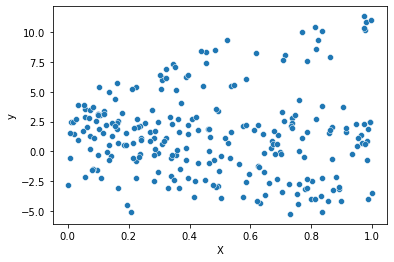

In [5]:
sns.scatterplot(x='X', y='y', data=dataset1)

<AxesSubplot:xlabel='X', ylabel='y'>

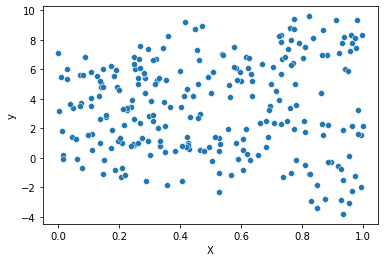

In [6]:
sns.scatterplot(x='X', y='y', data=dataset2)

## Mixture Model

Given,

The following Gaussian mixture model for a dataset $y = (y_1,\ldots,y_n)$, where
each observation $y_i$ has a one-dimensional covariate $x_i$:

$$L(y_i| x_i, \boldsymbol{\beta}, \boldsymbol{w}, \sigma^2, K) = \sum_{k=1}^K w_k \mathcal{N}(\beta_{0k} + \beta_{1k} x_i, \sigma^2)$$

We are also given the number of mixture components as $K=3$

The prior densities are given as follows:

1. We are given that $\boldsymbol{\beta}_k \sim MVN(0, 100\mathbf{\textit{I}})$. The prior density for $\boldsymbol{\beta}_k$ can be written as,

    $$f^{prior}(\boldsymbol{\beta}_k) \propto \exp\bigg(-\frac{{\beta_k}^2}{2 \times 100}\bigg)$$
    
2. We know, $\sigma^2|a \sim IG(\frac{1}{2}, \frac{1}{a})$ and $a \sim IG(\frac{1}{2}, \frac{1}{5^2})$. The prior densities for $\sigma^2$ and $a$ can be written as,

$$
\begin{eqnarray}
f^{prior}(\sigma^2|a) &\propto& (\sigma)^{-3} \exp\bigg(\frac{-1}{a\sigma^2}\bigg) \\
f^{prior}(a) &\propto& (a)^{\frac{-3}{2}} \exp\bigg(\frac{-1}{25a}\bigg)
\end{eqnarray}
$$

    and,
    
$$
\begin{eqnarray}
f^{prior}(\sigma^2) \propto f^{prior}(\sigma^2|a) f^{prior}(a)
\end{eqnarray}
$$

3. For the mixture component weights, we choose a Dirichlet prior as $\boldsymbol{w} \sim \mathsf{Dir}(2, 2, 2)$. The prior densities are given as,

$$
\begin{eqnarray}
f^{prior}(\boldsymbol{w}) &=& \frac{1}{B(\boldsymbol{\alpha})} \prod_{k=1}^{K} w_k^{\alpha_k-1} \\
&\propto& \prod_{k=1}^{K} w_k
\end{eqnarray}
$$


### Part (a): Joint Posterior Distribution

The joint posterior distribution of $(\boldsymbol{\beta}, \boldsymbol{w}, \sigma^2, a)$ is given as,

$$
\begin{eqnarray}
f^{post}(\boldsymbol{\beta}, \boldsymbol{w}, \sigma^2, a | \mathbf{y}, \mathbf{x}) &\propto& L(\mathbf{y}| \mathbf{x}, \boldsymbol{\beta}, \boldsymbol{w}, \sigma^2) f^{prior}(\boldsymbol{\beta}, \boldsymbol{w}, \sigma^2, a)\\
&\propto& \sigma^{-3} \exp\bigg(\frac{-1}{a\sigma^2}\bigg) . a^{\frac{-3}{2}} \exp\bigg(\frac{-1}{25a}\bigg)\\ 
&& \prod_{k=1}^{3} w_k \exp\bigg(-\frac{(\beta_{0k}^2 + \beta_{1k}^2)}{2\times100}\bigg)\\
&& \prod_{i=1}^{n} \sum_{k=1}^{3} w_k \exp\bigg(-\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)
\end{eqnarray}
$$

### Part (b): Conditional posterior distribution of the parameters

The full conditional posterior distributions of the parameters in the posterior are given as:

1. $f^{post}(\boldsymbol{\beta}_k \mid \mathbf{y}, \mathbf{x}, \boldsymbol{w}, \sigma^2, a) \propto \exp\bigg(-\frac{(\beta_{0k}^2 + \beta_{1k}^2)}{2\times100}\bigg) \prod_{i=1}^{n} \sum_{k=1}^{3} w_k \exp\bigg(-\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)$

2. $f^{post}(w_k \mid \mathbf{y}, \mathbf{x}, \boldsymbol{\beta}, \sigma^2, a) \propto w_k \prod_{i=1}^{n} \sum_{k=1}^{3} w_k \exp\bigg(-\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)$

3. $f^{post}(\sigma^2 \mid \mathbf{y}, \mathbf{x}, \boldsymbol{\beta}, \boldsymbol{w}, a) \propto \sigma^{-3} \exp\bigg(\frac{-1}{a\sigma^2}\bigg) \prod_{i=1}^{n} \sum_{k=1}^{3} w_k \exp\bigg(-\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)$

4. $f^{post}(a \mid \mathbf{y}, \mathbf{x}, \boldsymbol{\beta}, \boldsymbol{w}, \sigma^2) \propto a^{\frac{-3}{2}} \exp\bigg(-\frac{1}{25a} -\frac{1}{a\sigma^2}\bigg)$


Gibbs Sampling is applicable when it is difficult to sample directly from the join posterior distribution but the conditional distribution of each parameter is easy to sample from. However, the above conditional posteriors consist of a weighted mixture of densities of normals. Sampling directly from this density is non-trivial. Hence, Gibbs sampling cannot be directly used to sample from this posterior distribution.

### Part (c): Introduce latent variable $\mathbf{z}$

The latent variable is defined as $\mathbf{z} = (z_1,z_2,\ldots,z_n)$. Here, $z_i$ labels the mixture component used to generate the observation $y_i$

The prior distribution for $z$ is given as,

- $P(z_i=1 \mid w_1) = w_1$
- $P(z_i=2 \mid w_2) = w_2$
- $P(z_i=3 \mid w_3) = w_3$

where, $i=1,\ldots,n$

### Part (d): Updated likelihood and conditional posteriors

After introducing the latent variable $\mathbf{z}$, the updated likelihood function can be written as,

$$L(\mathbf{y}| \mathbf{x}, \boldsymbol{\beta}, \mathbf{z}, \boldsymbol{w}, \sigma^2, K) \propto \prod_{i=1}^{n} w_{z_i} \exp\bigg(-\frac{(y_i - (\beta_{0z_i}+\beta_{1z_i}x_i))^2}{2\sigma^2} \bigg)$$

The updated conditional posteriors are written as,


- $f^{post}(\boldsymbol{\beta}_k \mid \mathbf{y}, \mathbf{x}, \mathbf{z}, \boldsymbol{w}, \sigma^2, a) \propto \exp\bigg(-\frac{(\beta_{0k}^2 + \beta_{1k}^2)}{2\times100}\bigg)  \exp\bigg(\sum_{i:z_i=k}^{n} -\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)$


- $f^{post}(z_i=k \mid \boldsymbol{\beta}_k, \mathbf{y}, \mathbf{x}, \boldsymbol{w}, \sigma^2, a) \propto w_k \exp\bigg(-\frac{(y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2\sigma^2} \bigg)$


- $
\begin{eqnarray}
f^{post}(\boldsymbol{w} \mid \boldsymbol{\beta}_k, \mathbf{y}, \mathbf{x}, \mathbf{z}, \sigma^2, a) &\propto& \prod_{i=1}^{n} w_{z_i}\\
&\propto& {w_1}^{|i:z=1|} {w_2}^{|i:z=2|} {w_3}^{|i:z=3|}\\
&\propto& \mathsf{Dir}(\alpha_1=|i:z_i=1|, \alpha_2=|i:z_i=2|, \alpha_3=|i:z_i=3|)
\end{eqnarray}
$



- $
\begin{eqnarray}
f^{post}(\sigma^2 \mid \boldsymbol{\beta}_k, \mathbf{y}, \mathbf{x}, \mathbf{z}, \boldsymbol{w}, a) &\propto& \sigma^{-3} \exp\bigg(\frac{-1}{a\sigma^2}\bigg)  \sigma^{-n} \exp\bigg(\sum_{i=1}^{n} -\frac{(y_i - (\beta_{0z_i}+\beta_{1z_i}x_i))^2}{2\sigma^2} \bigg)\\
&\propto& \sigma^{-3-n} \exp\bigg(- \frac{(2 + a\sum_{i=1}^{n} (y_i - (\beta_{0z_i}+\beta_{1z_i}x_i))^2)}{2a\sigma^2} \bigg)\\
&\propto& IG(u,v) 
\end{eqnarray}
$

    where $u=\frac{n+1}{2}$ and $v=\frac{2 + a\sum_{i=1}^{n} (y_i - (\beta_{0k}+\beta_{1k}x_i))^2}{2a}$

- $
\begin{eqnarray}
f^{post}(a \mid \boldsymbol{\beta}_k, \mathbf{y}, \mathbf{x}, \mathbf{z}, \boldsymbol{w}, \sigma^2) &\propto&  a^{\frac{-3}{2}} \exp\bigg(-\frac{1}{25a} -\frac{1}{a\sigma^2}\bigg)\\
&\propto& a^{\frac{-3}{2}}\exp\bigg(-\frac{25+\sigma^2}{25a\sigma^2}\bigg)\\
&\propto& IG\bigg(\frac{1}{2}, \frac{25+\sigma^2}{25\sigma^2}\bigg)
\end{eqnarray}
$

## Part (e) and (f): Gibbs Sampler

In [7]:
class MCMC:
    
    def __init__(self, epsilon, logp, size=1):
        self.epsilon = epsilon
        self.logp = logp
        self.size = size
    
    def run_sampling(self, N=1000):
        # Initialize samples
        samples = np.zeros((N, self.size))

        # First sample
        samples[0] = np.random.randn(self.size)

        # Count of accepted samples
        N_accepted = 0

        # Start sampling
        for n in range(N-1):
            
            # Generate proposal
            theta_c = samples[n]
            samples[n + 1], accepted = self.generate_sample(theta_c)

            if accepted:
                N_accepted += 1
        
        return samples, accepted

    
    def generate_sample(self, theta_c):
        
        theta_p = theta_c + self.epsilon * np.random.normal(0, 1, self.size)

        # Evaluate acceptance prob
        delta_logp = self.logp(theta_p) - self.logp(theta_c)

        alpha = min(1, np.exp(delta_logp))
        
        u = np.random.uniform(0, 1)

        # Accept/Reject
        if alpha > u:
            return theta_p, True
        else:
            return theta_c, False

    def plot_samples(self, samples):
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.grid(alpha = 0.2)
        ax.hist(samples, alpha=0.6, density=True)
        ax.set_title("Sampled Distribution")
        return ax

In [8]:
def gibbs_w(z):
    """function to sample from the conditional posterior of weight parameter `w`"""
    alpha = np.array([np.sum(z==1), np.sum(z==2), np.sum(z==3)])
    return stats.dirichlet.rvs(alpha, size=1)[0]

In [9]:
def gibbs_beta(k, z, y, X, sigma_sq):
    """function to sample from the conditional posterior of parameters `β`"""
    
    # Since I was unable to identify the parameters for actual Gaussian that's the conditional posterior,
    # I am instead using a small MCMC step to sample directly from the density
    def logp(beta):
        return (- np.square(beta).sum()*sigma_sq - 100*np.sum(np.square(y[z==k] - X[z==k] @ beta)))/(200*sigma_sq)
        
    sampler = MCMC(epsilon=0.01, logp=logp, size=2)
    samples, accepted = sampler.run_sampling(1000)
        
    return samples[-1]

In [10]:
def gibbs_sigma_sq(z, y, X, beta1, beta2, beta3, a):
    """function to sample from the conditional posterior of signal variance `σ^2`"""
    beta = [beta1, beta2, beta3]
    n = y.shape[0]
    # First parameter of IG
    u = (n+1)/2
    # Second parameter of the IG
    v = (2 + a * np.sum(np.square(np.hstack([y[z==k+1] - X[z==k+1] @ beta[k] for k in range(3)])), axis=0))/(2*a)
    # Sample from IG
    invg_dist = stats.invgamma(u, v)
    return invg_dist.rvs(1)[0]

In [11]:
def gibbs_a(sigma_sq):
    """function to sample from the conditional posterior of parameter `a`"""
    invg_dist = stats.invgamma(0.5, (25+sigma_sq)/(25*sigma_sq))
    return invg_dist.rvs(1)[0]

In [12]:
def gibbs_z(y, X, beta1, beta2, beta3, w, sigma_sq):
    """function to sample from the conditional posterior of latent variable `z`"""
    
    # log probabilities of observations belonging to the first mixture component
    logp1 = np.log(w[0]) + np.expand_dims(stats.norm.logpdf(y, loc=X @ beta1, scale=np.sqrt(sigma_sq)), axis=1)
    
    # log probabilities of observations belonging to the first mixture component
    logp2 = np.log(w[1]) + np.expand_dims(stats.norm.logpdf(y, loc=X @ beta2, scale=np.sqrt(sigma_sq)), axis=1)
    
    # log probabilities of observations belonging to the first mixture component
    logp3 = np.log(w[2]) + np.expand_dims(stats.norm.logpdf(y, loc=X @ beta3, scale=np.sqrt(sigma_sq)), axis=1)
    
    # Concatenate into one matrix
    logp = np.concatenate([logp1, logp2, logp3], axis=1)
    
    # Take exponential of log probabilities
    # Before exponential function we substract the max of the logp values accross observations
    # This is done for numerical stability
    p = np.exp(logp - logp.max(axis=0))
    
    # Normalize the probabilities such that p1 + p2 + p3 = 1
    p = p/np.expand_dims(np.sum(p, axis=1), axis=1)
    
    # Sample from [1, 2, 3] with probabilities calculated as shown above
    return np.array([np.random.choice([1, 2, 3], 1, p=p_val) for p_val in p]).flatten()
    

In [13]:
def sample_mixture(N, y, X, beta1_init, beta2_init, beta3_init, sigma_sq_init, a_init, w_init, z_init):
    
    # Initialize samples for beta for first mixture component
    beta1 = np.zeros((N, 2))
    beta1[0] = beta1_init
    
    # Initialize samples for beta for second mixture component
    beta2 = np.zeros((N, 2))
    beta2[0] = beta2_init
    
    # Initialize samples for beta for third mixture component
    beta3 = np.zeros((N, 2))
    beta3[0] = beta3_init
    
    # Initialize samples for beta for parameter `a`
    a = np.zeros(N)
    a[0] = a_init
    
    # Initialize samples for beta for signal variance
    sigma_sq = np.zeros(N)
    sigma_sq[0] = sigma_sq_init
   
    # Initialize samples for beta for mixture component weights 
    w = np.zeros((N, 3))
    w[0] = w_init
    
    # Initialize samples for beta for latent variable z
    z = np.zeros((N, z_init.shape[0]))
    z[0] = z_init
    
    # Generate samples
    for i in range(1, N):
        
        # Sample beta from conditional posterior
        beta1[i] = gibbs_beta(k=1, z=z[i-1], y=y, X=X, sigma_sq=sigma_sq[i-1])
        beta2[i] = gibbs_beta(k=2, z=z[i-1], y=y, X=X, sigma_sq=sigma_sq[i-1])
        beta3[i] = gibbs_beta(k=3, z=z[i-1], y=y, X=X, sigma_sq=sigma_sq[i-1])
        
        # Sample a
        a[i] = gibbs_a(sigma_sq[i-1])
        
        # Sample signal variance sigma_sq
        sigma_sq[i] = gibbs_sigma_sq(z[i-1], y, X, beta1[i], beta2[i], beta3[i], a[i])
        
        # Sample weights w
        w[i] = gibbs_w(z[i-1])
        
        # Sample latent variable z
        z[i] = gibbs_z(y, X, beta1[i], beta2[i], beta3[i], w[i], sigma_sq[i])
        
        print(f"Sampled {i}/{N}")
        
    return beta1, beta2, beta3, a, sigma_sq, w, z

### Dataset 1

In [15]:
X1 = dataset1[['X']].values
X1 = np.concatenate([np.ones(X1.shape), X1], axis=1)

y1 = dataset1.y.values

In [16]:
N = 25000
beta1_init, beta2_init, beta3_init = np.random.normal(0, 10, (3, 2))
a_init = 0.5
sigma_sq_init = 0.25
z_init = np.random.choice([1, 2, 3], y1.shape[0])
w_init = (0.33, 0.33, 0.33)

In [17]:
beta1, beta2, beta3, a, sigma_sq, w, z = sample_mixture(
    N, y1, X1, 
    beta1_init, beta2_init, beta3_init, 
    sigma_sq_init, a_init, w_init, z_init
)

Sampled 1/25000
Sampled 2/25000
Sampled 3/25000
Sampled 4/25000
Sampled 5/25000
Sampled 6/25000
Sampled 7/25000
Sampled 8/25000
Sampled 9/25000
Sampled 10/25000
Sampled 11/25000
Sampled 12/25000
Sampled 13/25000
Sampled 14/25000
Sampled 15/25000
Sampled 16/25000
Sampled 17/25000
Sampled 18/25000
Sampled 19/25000
Sampled 20/25000
Sampled 21/25000
Sampled 22/25000
Sampled 23/25000
Sampled 24/25000
Sampled 25/25000
Sampled 26/25000
Sampled 27/25000
Sampled 28/25000
Sampled 29/25000
Sampled 30/25000
Sampled 31/25000
Sampled 32/25000
Sampled 33/25000
Sampled 34/25000
Sampled 35/25000
Sampled 36/25000
Sampled 37/25000
Sampled 38/25000
Sampled 39/25000
Sampled 40/25000
Sampled 41/25000
Sampled 42/25000
Sampled 43/25000
Sampled 44/25000
Sampled 45/25000
Sampled 46/25000
Sampled 47/25000
Sampled 48/25000
Sampled 49/25000
Sampled 50/25000
Sampled 51/25000
Sampled 52/25000
Sampled 53/25000
Sampled 54/25000
Sampled 55/25000
Sampled 56/25000
Sampled 57/25000
Sampled 58/25000
Sampled 59/25000
Sample

Sampled 464/25000
Sampled 465/25000
Sampled 466/25000
Sampled 467/25000
Sampled 468/25000
Sampled 469/25000
Sampled 470/25000
Sampled 471/25000
Sampled 472/25000
Sampled 473/25000
Sampled 474/25000
Sampled 475/25000
Sampled 476/25000
Sampled 477/25000
Sampled 478/25000
Sampled 479/25000
Sampled 480/25000
Sampled 481/25000
Sampled 482/25000
Sampled 483/25000
Sampled 484/25000
Sampled 485/25000
Sampled 486/25000
Sampled 487/25000
Sampled 488/25000
Sampled 489/25000
Sampled 490/25000
Sampled 491/25000
Sampled 492/25000
Sampled 493/25000
Sampled 494/25000
Sampled 495/25000
Sampled 496/25000
Sampled 497/25000
Sampled 498/25000
Sampled 499/25000
Sampled 500/25000
Sampled 501/25000
Sampled 502/25000
Sampled 503/25000
Sampled 504/25000
Sampled 505/25000
Sampled 506/25000
Sampled 507/25000
Sampled 508/25000
Sampled 509/25000
Sampled 510/25000
Sampled 511/25000
Sampled 512/25000
Sampled 513/25000
Sampled 514/25000
Sampled 515/25000
Sampled 516/25000
Sampled 517/25000
Sampled 518/25000
Sampled 51

Sampled 921/25000
Sampled 922/25000
Sampled 923/25000
Sampled 924/25000
Sampled 925/25000
Sampled 926/25000
Sampled 927/25000
Sampled 928/25000
Sampled 929/25000
Sampled 930/25000
Sampled 931/25000
Sampled 932/25000
Sampled 933/25000
Sampled 934/25000
Sampled 935/25000
Sampled 936/25000
Sampled 937/25000
Sampled 938/25000
Sampled 939/25000
Sampled 940/25000
Sampled 941/25000
Sampled 942/25000
Sampled 943/25000
Sampled 944/25000
Sampled 945/25000
Sampled 946/25000
Sampled 947/25000
Sampled 948/25000
Sampled 949/25000
Sampled 950/25000
Sampled 951/25000
Sampled 952/25000
Sampled 953/25000
Sampled 954/25000
Sampled 955/25000
Sampled 956/25000
Sampled 957/25000
Sampled 958/25000
Sampled 959/25000
Sampled 960/25000
Sampled 961/25000
Sampled 962/25000
Sampled 963/25000
Sampled 964/25000
Sampled 965/25000
Sampled 966/25000
Sampled 967/25000
Sampled 968/25000
Sampled 969/25000
Sampled 970/25000
Sampled 971/25000
Sampled 972/25000
Sampled 973/25000
Sampled 974/25000
Sampled 975/25000
Sampled 97

Sampled 1357/25000
Sampled 1358/25000
Sampled 1359/25000
Sampled 1360/25000
Sampled 1361/25000
Sampled 1362/25000
Sampled 1363/25000
Sampled 1364/25000
Sampled 1365/25000
Sampled 1366/25000
Sampled 1367/25000
Sampled 1368/25000
Sampled 1369/25000
Sampled 1370/25000
Sampled 1371/25000
Sampled 1372/25000
Sampled 1373/25000
Sampled 1374/25000
Sampled 1375/25000
Sampled 1376/25000
Sampled 1377/25000
Sampled 1378/25000
Sampled 1379/25000
Sampled 1380/25000
Sampled 1381/25000
Sampled 1382/25000
Sampled 1383/25000
Sampled 1384/25000
Sampled 1385/25000
Sampled 1386/25000
Sampled 1387/25000
Sampled 1388/25000
Sampled 1389/25000
Sampled 1390/25000
Sampled 1391/25000
Sampled 1392/25000
Sampled 1393/25000
Sampled 1394/25000
Sampled 1395/25000
Sampled 1396/25000
Sampled 1397/25000
Sampled 1398/25000
Sampled 1399/25000
Sampled 1400/25000
Sampled 1401/25000
Sampled 1402/25000
Sampled 1403/25000
Sampled 1404/25000
Sampled 1405/25000
Sampled 1406/25000
Sampled 1407/25000
Sampled 1408/25000
Sampled 1409

Sampled 1789/25000
Sampled 1790/25000
Sampled 1791/25000
Sampled 1792/25000
Sampled 1793/25000
Sampled 1794/25000
Sampled 1795/25000
Sampled 1796/25000
Sampled 1797/25000
Sampled 1798/25000
Sampled 1799/25000
Sampled 1800/25000
Sampled 1801/25000
Sampled 1802/25000
Sampled 1803/25000
Sampled 1804/25000
Sampled 1805/25000
Sampled 1806/25000
Sampled 1807/25000
Sampled 1808/25000
Sampled 1809/25000
Sampled 1810/25000
Sampled 1811/25000
Sampled 1812/25000
Sampled 1813/25000
Sampled 1814/25000
Sampled 1815/25000
Sampled 1816/25000
Sampled 1817/25000
Sampled 1818/25000
Sampled 1819/25000
Sampled 1820/25000
Sampled 1821/25000
Sampled 1822/25000
Sampled 1823/25000
Sampled 1824/25000
Sampled 1825/25000
Sampled 1826/25000
Sampled 1827/25000
Sampled 1828/25000
Sampled 1829/25000
Sampled 1830/25000
Sampled 1831/25000
Sampled 1832/25000
Sampled 1833/25000
Sampled 1834/25000
Sampled 1835/25000
Sampled 1836/25000
Sampled 1837/25000
Sampled 1838/25000
Sampled 1839/25000
Sampled 1840/25000
Sampled 1841

Sampled 2221/25000
Sampled 2222/25000
Sampled 2223/25000
Sampled 2224/25000
Sampled 2225/25000
Sampled 2226/25000
Sampled 2227/25000
Sampled 2228/25000
Sampled 2229/25000
Sampled 2230/25000
Sampled 2231/25000
Sampled 2232/25000
Sampled 2233/25000
Sampled 2234/25000
Sampled 2235/25000
Sampled 2236/25000
Sampled 2237/25000
Sampled 2238/25000
Sampled 2239/25000
Sampled 2240/25000
Sampled 2241/25000
Sampled 2242/25000
Sampled 2243/25000
Sampled 2244/25000
Sampled 2245/25000
Sampled 2246/25000
Sampled 2247/25000
Sampled 2248/25000
Sampled 2249/25000
Sampled 2250/25000
Sampled 2251/25000
Sampled 2252/25000
Sampled 2253/25000
Sampled 2254/25000
Sampled 2255/25000
Sampled 2256/25000
Sampled 2257/25000
Sampled 2258/25000
Sampled 2259/25000
Sampled 2260/25000
Sampled 2261/25000
Sampled 2262/25000
Sampled 2263/25000
Sampled 2264/25000
Sampled 2265/25000
Sampled 2266/25000
Sampled 2267/25000
Sampled 2268/25000
Sampled 2269/25000
Sampled 2270/25000
Sampled 2271/25000
Sampled 2272/25000
Sampled 2273

Sampled 2654/25000
Sampled 2655/25000
Sampled 2656/25000
Sampled 2657/25000
Sampled 2658/25000
Sampled 2659/25000
Sampled 2660/25000
Sampled 2661/25000
Sampled 2662/25000
Sampled 2663/25000
Sampled 2664/25000
Sampled 2665/25000
Sampled 2666/25000
Sampled 2667/25000
Sampled 2668/25000
Sampled 2669/25000
Sampled 2670/25000
Sampled 2671/25000
Sampled 2672/25000
Sampled 2673/25000
Sampled 2674/25000
Sampled 2675/25000
Sampled 2676/25000
Sampled 2677/25000
Sampled 2678/25000
Sampled 2679/25000
Sampled 2680/25000
Sampled 2681/25000
Sampled 2682/25000
Sampled 2683/25000
Sampled 2684/25000
Sampled 2685/25000
Sampled 2686/25000
Sampled 2687/25000
Sampled 2688/25000
Sampled 2689/25000
Sampled 2690/25000
Sampled 2691/25000
Sampled 2692/25000
Sampled 2693/25000
Sampled 2694/25000
Sampled 2695/25000
Sampled 2696/25000
Sampled 2697/25000
Sampled 2698/25000
Sampled 2699/25000
Sampled 2700/25000
Sampled 2701/25000
Sampled 2702/25000
Sampled 2703/25000
Sampled 2704/25000
Sampled 2705/25000
Sampled 2706

Sampled 3086/25000
Sampled 3087/25000
Sampled 3088/25000
Sampled 3089/25000
Sampled 3090/25000
Sampled 3091/25000
Sampled 3092/25000
Sampled 3093/25000
Sampled 3094/25000
Sampled 3095/25000
Sampled 3096/25000
Sampled 3097/25000
Sampled 3098/25000
Sampled 3099/25000
Sampled 3100/25000
Sampled 3101/25000
Sampled 3102/25000
Sampled 3103/25000
Sampled 3104/25000
Sampled 3105/25000
Sampled 3106/25000
Sampled 3107/25000
Sampled 3108/25000
Sampled 3109/25000
Sampled 3110/25000
Sampled 3111/25000
Sampled 3112/25000
Sampled 3113/25000
Sampled 3114/25000
Sampled 3115/25000
Sampled 3116/25000
Sampled 3117/25000
Sampled 3118/25000
Sampled 3119/25000
Sampled 3120/25000
Sampled 3121/25000
Sampled 3122/25000
Sampled 3123/25000
Sampled 3124/25000
Sampled 3125/25000
Sampled 3126/25000
Sampled 3127/25000
Sampled 3128/25000
Sampled 3129/25000
Sampled 3130/25000
Sampled 3131/25000
Sampled 3132/25000
Sampled 3133/25000
Sampled 3134/25000
Sampled 3135/25000
Sampled 3136/25000
Sampled 3137/25000
Sampled 3138

Sampled 3518/25000
Sampled 3519/25000
Sampled 3520/25000
Sampled 3521/25000
Sampled 3522/25000
Sampled 3523/25000
Sampled 3524/25000
Sampled 3525/25000
Sampled 3526/25000
Sampled 3527/25000
Sampled 3528/25000
Sampled 3529/25000
Sampled 3530/25000
Sampled 3531/25000
Sampled 3532/25000
Sampled 3533/25000
Sampled 3534/25000
Sampled 3535/25000
Sampled 3536/25000
Sampled 3537/25000
Sampled 3538/25000
Sampled 3539/25000
Sampled 3540/25000
Sampled 3541/25000
Sampled 3542/25000
Sampled 3543/25000
Sampled 3544/25000
Sampled 3545/25000
Sampled 3546/25000
Sampled 3547/25000
Sampled 3548/25000
Sampled 3549/25000
Sampled 3550/25000
Sampled 3551/25000
Sampled 3552/25000
Sampled 3553/25000
Sampled 3554/25000
Sampled 3555/25000
Sampled 3556/25000
Sampled 3557/25000
Sampled 3558/25000
Sampled 3559/25000
Sampled 3560/25000
Sampled 3561/25000
Sampled 3562/25000
Sampled 3563/25000
Sampled 3564/25000
Sampled 3565/25000
Sampled 3566/25000
Sampled 3567/25000
Sampled 3568/25000
Sampled 3569/25000
Sampled 3570

Sampled 3951/25000
Sampled 3952/25000
Sampled 3953/25000
Sampled 3954/25000
Sampled 3955/25000
Sampled 3956/25000
Sampled 3957/25000
Sampled 3958/25000
Sampled 3959/25000
Sampled 3960/25000
Sampled 3961/25000
Sampled 3962/25000
Sampled 3963/25000
Sampled 3964/25000
Sampled 3965/25000
Sampled 3966/25000
Sampled 3967/25000
Sampled 3968/25000
Sampled 3969/25000
Sampled 3970/25000
Sampled 3971/25000
Sampled 3972/25000
Sampled 3973/25000
Sampled 3974/25000
Sampled 3975/25000
Sampled 3976/25000
Sampled 3977/25000
Sampled 3978/25000
Sampled 3979/25000
Sampled 3980/25000
Sampled 3981/25000
Sampled 3982/25000
Sampled 3983/25000
Sampled 3984/25000
Sampled 3985/25000
Sampled 3986/25000
Sampled 3987/25000
Sampled 3988/25000
Sampled 3989/25000
Sampled 3990/25000
Sampled 3991/25000
Sampled 3992/25000
Sampled 3993/25000
Sampled 3994/25000
Sampled 3995/25000
Sampled 3996/25000
Sampled 3997/25000
Sampled 3998/25000
Sampled 3999/25000
Sampled 4000/25000
Sampled 4001/25000
Sampled 4002/25000
Sampled 4003

Sampled 4383/25000
Sampled 4384/25000
Sampled 4385/25000
Sampled 4386/25000
Sampled 4387/25000
Sampled 4388/25000
Sampled 4389/25000
Sampled 4390/25000
Sampled 4391/25000
Sampled 4392/25000
Sampled 4393/25000
Sampled 4394/25000
Sampled 4395/25000
Sampled 4396/25000
Sampled 4397/25000
Sampled 4398/25000
Sampled 4399/25000
Sampled 4400/25000
Sampled 4401/25000
Sampled 4402/25000
Sampled 4403/25000
Sampled 4404/25000
Sampled 4405/25000
Sampled 4406/25000
Sampled 4407/25000
Sampled 4408/25000
Sampled 4409/25000
Sampled 4410/25000
Sampled 4411/25000
Sampled 4412/25000
Sampled 4413/25000
Sampled 4414/25000
Sampled 4415/25000
Sampled 4416/25000
Sampled 4417/25000
Sampled 4418/25000
Sampled 4419/25000
Sampled 4420/25000
Sampled 4421/25000
Sampled 4422/25000
Sampled 4423/25000
Sampled 4424/25000
Sampled 4425/25000
Sampled 4426/25000
Sampled 4427/25000
Sampled 4428/25000
Sampled 4429/25000
Sampled 4430/25000
Sampled 4431/25000
Sampled 4432/25000
Sampled 4433/25000
Sampled 4434/25000
Sampled 4435

Sampled 4816/25000
Sampled 4817/25000
Sampled 4818/25000
Sampled 4819/25000
Sampled 4820/25000
Sampled 4821/25000
Sampled 4822/25000
Sampled 4823/25000
Sampled 4824/25000
Sampled 4825/25000
Sampled 4826/25000
Sampled 4827/25000
Sampled 4828/25000
Sampled 4829/25000
Sampled 4830/25000
Sampled 4831/25000
Sampled 4832/25000
Sampled 4833/25000
Sampled 4834/25000
Sampled 4835/25000
Sampled 4836/25000
Sampled 4837/25000
Sampled 4838/25000
Sampled 4839/25000
Sampled 4840/25000
Sampled 4841/25000
Sampled 4842/25000
Sampled 4843/25000
Sampled 4844/25000
Sampled 4845/25000
Sampled 4846/25000
Sampled 4847/25000
Sampled 4848/25000
Sampled 4849/25000
Sampled 4850/25000
Sampled 4851/25000
Sampled 4852/25000
Sampled 4853/25000
Sampled 4854/25000
Sampled 4855/25000
Sampled 4856/25000
Sampled 4857/25000
Sampled 4858/25000
Sampled 4859/25000
Sampled 4860/25000
Sampled 4861/25000
Sampled 4862/25000
Sampled 4863/25000
Sampled 4864/25000
Sampled 4865/25000
Sampled 4866/25000
Sampled 4867/25000
Sampled 4868

Sampled 5248/25000
Sampled 5249/25000
Sampled 5250/25000
Sampled 5251/25000
Sampled 5252/25000
Sampled 5253/25000
Sampled 5254/25000
Sampled 5255/25000
Sampled 5256/25000
Sampled 5257/25000
Sampled 5258/25000
Sampled 5259/25000
Sampled 5260/25000
Sampled 5261/25000
Sampled 5262/25000
Sampled 5263/25000
Sampled 5264/25000
Sampled 5265/25000
Sampled 5266/25000
Sampled 5267/25000
Sampled 5268/25000
Sampled 5269/25000
Sampled 5270/25000
Sampled 5271/25000
Sampled 5272/25000
Sampled 5273/25000
Sampled 5274/25000
Sampled 5275/25000
Sampled 5276/25000
Sampled 5277/25000
Sampled 5278/25000
Sampled 5279/25000
Sampled 5280/25000
Sampled 5281/25000
Sampled 5282/25000
Sampled 5283/25000
Sampled 5284/25000
Sampled 5285/25000
Sampled 5286/25000
Sampled 5287/25000
Sampled 5288/25000
Sampled 5289/25000
Sampled 5290/25000
Sampled 5291/25000
Sampled 5292/25000
Sampled 5293/25000
Sampled 5294/25000
Sampled 5295/25000
Sampled 5296/25000
Sampled 5297/25000
Sampled 5298/25000
Sampled 5299/25000
Sampled 5300

Sampled 5680/25000
Sampled 5681/25000
Sampled 5682/25000
Sampled 5683/25000
Sampled 5684/25000
Sampled 5685/25000
Sampled 5686/25000
Sampled 5687/25000
Sampled 5688/25000
Sampled 5689/25000
Sampled 5690/25000
Sampled 5691/25000
Sampled 5692/25000
Sampled 5693/25000
Sampled 5694/25000
Sampled 5695/25000
Sampled 5696/25000
Sampled 5697/25000
Sampled 5698/25000
Sampled 5699/25000
Sampled 5700/25000
Sampled 5701/25000
Sampled 5702/25000
Sampled 5703/25000
Sampled 5704/25000
Sampled 5705/25000
Sampled 5706/25000
Sampled 5707/25000
Sampled 5708/25000
Sampled 5709/25000
Sampled 5710/25000
Sampled 5711/25000
Sampled 5712/25000
Sampled 5713/25000
Sampled 5714/25000
Sampled 5715/25000
Sampled 5716/25000
Sampled 5717/25000
Sampled 5718/25000
Sampled 5719/25000
Sampled 5720/25000
Sampled 5721/25000
Sampled 5722/25000
Sampled 5723/25000
Sampled 5724/25000
Sampled 5725/25000
Sampled 5726/25000
Sampled 5727/25000
Sampled 5728/25000
Sampled 5729/25000
Sampled 5730/25000
Sampled 5731/25000
Sampled 5732

Sampled 6112/25000
Sampled 6113/25000
Sampled 6114/25000
Sampled 6115/25000
Sampled 6116/25000
Sampled 6117/25000
Sampled 6118/25000
Sampled 6119/25000
Sampled 6120/25000
Sampled 6121/25000
Sampled 6122/25000
Sampled 6123/25000
Sampled 6124/25000
Sampled 6125/25000
Sampled 6126/25000
Sampled 6127/25000
Sampled 6128/25000
Sampled 6129/25000
Sampled 6130/25000
Sampled 6131/25000
Sampled 6132/25000
Sampled 6133/25000
Sampled 6134/25000
Sampled 6135/25000
Sampled 6136/25000
Sampled 6137/25000
Sampled 6138/25000
Sampled 6139/25000
Sampled 6140/25000
Sampled 6141/25000
Sampled 6142/25000
Sampled 6143/25000
Sampled 6144/25000
Sampled 6145/25000
Sampled 6146/25000
Sampled 6147/25000
Sampled 6148/25000
Sampled 6149/25000
Sampled 6150/25000
Sampled 6151/25000
Sampled 6152/25000
Sampled 6153/25000
Sampled 6154/25000
Sampled 6155/25000
Sampled 6156/25000
Sampled 6157/25000
Sampled 6158/25000
Sampled 6159/25000
Sampled 6160/25000
Sampled 6161/25000
Sampled 6162/25000
Sampled 6163/25000
Sampled 6164

Sampled 6545/25000
Sampled 6546/25000
Sampled 6547/25000
Sampled 6548/25000
Sampled 6549/25000
Sampled 6550/25000
Sampled 6551/25000
Sampled 6552/25000
Sampled 6553/25000
Sampled 6554/25000
Sampled 6555/25000
Sampled 6556/25000
Sampled 6557/25000
Sampled 6558/25000
Sampled 6559/25000
Sampled 6560/25000
Sampled 6561/25000
Sampled 6562/25000
Sampled 6563/25000
Sampled 6564/25000
Sampled 6565/25000
Sampled 6566/25000
Sampled 6567/25000
Sampled 6568/25000
Sampled 6569/25000
Sampled 6570/25000
Sampled 6571/25000
Sampled 6572/25000
Sampled 6573/25000
Sampled 6574/25000
Sampled 6575/25000
Sampled 6576/25000
Sampled 6577/25000
Sampled 6578/25000
Sampled 6579/25000
Sampled 6580/25000
Sampled 6581/25000
Sampled 6582/25000
Sampled 6583/25000
Sampled 6584/25000
Sampled 6585/25000
Sampled 6586/25000
Sampled 6587/25000
Sampled 6588/25000
Sampled 6589/25000
Sampled 6590/25000
Sampled 6591/25000
Sampled 6592/25000
Sampled 6593/25000
Sampled 6594/25000
Sampled 6595/25000
Sampled 6596/25000
Sampled 6597

Sampled 6977/25000
Sampled 6978/25000
Sampled 6979/25000
Sampled 6980/25000
Sampled 6981/25000
Sampled 6982/25000
Sampled 6983/25000
Sampled 6984/25000
Sampled 6985/25000
Sampled 6986/25000
Sampled 6987/25000
Sampled 6988/25000
Sampled 6989/25000
Sampled 6990/25000
Sampled 6991/25000
Sampled 6992/25000
Sampled 6993/25000
Sampled 6994/25000
Sampled 6995/25000
Sampled 6996/25000
Sampled 6997/25000
Sampled 6998/25000
Sampled 6999/25000
Sampled 7000/25000
Sampled 7001/25000
Sampled 7002/25000
Sampled 7003/25000
Sampled 7004/25000
Sampled 7005/25000
Sampled 7006/25000
Sampled 7007/25000
Sampled 7008/25000
Sampled 7009/25000
Sampled 7010/25000
Sampled 7011/25000
Sampled 7012/25000
Sampled 7013/25000
Sampled 7014/25000
Sampled 7015/25000
Sampled 7016/25000
Sampled 7017/25000
Sampled 7018/25000
Sampled 7019/25000
Sampled 7020/25000
Sampled 7021/25000
Sampled 7022/25000
Sampled 7023/25000
Sampled 7024/25000
Sampled 7025/25000
Sampled 7026/25000
Sampled 7027/25000
Sampled 7028/25000
Sampled 7029

Sampled 7410/25000
Sampled 7411/25000
Sampled 7412/25000
Sampled 7413/25000
Sampled 7414/25000
Sampled 7415/25000
Sampled 7416/25000
Sampled 7417/25000
Sampled 7418/25000
Sampled 7419/25000
Sampled 7420/25000
Sampled 7421/25000
Sampled 7422/25000
Sampled 7423/25000
Sampled 7424/25000
Sampled 7425/25000
Sampled 7426/25000
Sampled 7427/25000
Sampled 7428/25000
Sampled 7429/25000
Sampled 7430/25000
Sampled 7431/25000
Sampled 7432/25000
Sampled 7433/25000
Sampled 7434/25000
Sampled 7435/25000
Sampled 7436/25000
Sampled 7437/25000
Sampled 7438/25000
Sampled 7439/25000
Sampled 7440/25000
Sampled 7441/25000
Sampled 7442/25000
Sampled 7443/25000
Sampled 7444/25000
Sampled 7445/25000
Sampled 7446/25000
Sampled 7447/25000
Sampled 7448/25000
Sampled 7449/25000
Sampled 7450/25000
Sampled 7451/25000
Sampled 7452/25000
Sampled 7453/25000
Sampled 7454/25000
Sampled 7455/25000
Sampled 7456/25000
Sampled 7457/25000
Sampled 7458/25000
Sampled 7459/25000
Sampled 7460/25000
Sampled 7461/25000
Sampled 7462

Sampled 7842/25000
Sampled 7843/25000
Sampled 7844/25000
Sampled 7845/25000
Sampled 7846/25000
Sampled 7847/25000
Sampled 7848/25000
Sampled 7849/25000
Sampled 7850/25000
Sampled 7851/25000
Sampled 7852/25000
Sampled 7853/25000
Sampled 7854/25000
Sampled 7855/25000
Sampled 7856/25000
Sampled 7857/25000
Sampled 7858/25000
Sampled 7859/25000
Sampled 7860/25000
Sampled 7861/25000
Sampled 7862/25000
Sampled 7863/25000
Sampled 7864/25000
Sampled 7865/25000
Sampled 7866/25000
Sampled 7867/25000
Sampled 7868/25000
Sampled 7869/25000
Sampled 7870/25000
Sampled 7871/25000
Sampled 7872/25000
Sampled 7873/25000
Sampled 7874/25000
Sampled 7875/25000
Sampled 7876/25000
Sampled 7877/25000
Sampled 7878/25000
Sampled 7879/25000
Sampled 7880/25000
Sampled 7881/25000
Sampled 7882/25000
Sampled 7883/25000
Sampled 7884/25000
Sampled 7885/25000
Sampled 7886/25000
Sampled 7887/25000
Sampled 7888/25000
Sampled 7889/25000
Sampled 7890/25000
Sampled 7891/25000
Sampled 7892/25000
Sampled 7893/25000
Sampled 7894

Sampled 8274/25000
Sampled 8275/25000
Sampled 8276/25000
Sampled 8277/25000
Sampled 8278/25000
Sampled 8279/25000
Sampled 8280/25000
Sampled 8281/25000
Sampled 8282/25000
Sampled 8283/25000
Sampled 8284/25000
Sampled 8285/25000
Sampled 8286/25000
Sampled 8287/25000
Sampled 8288/25000
Sampled 8289/25000
Sampled 8290/25000
Sampled 8291/25000
Sampled 8292/25000
Sampled 8293/25000
Sampled 8294/25000
Sampled 8295/25000
Sampled 8296/25000
Sampled 8297/25000
Sampled 8298/25000
Sampled 8299/25000
Sampled 8300/25000
Sampled 8301/25000
Sampled 8302/25000
Sampled 8303/25000
Sampled 8304/25000
Sampled 8305/25000
Sampled 8306/25000
Sampled 8307/25000
Sampled 8308/25000
Sampled 8309/25000
Sampled 8310/25000
Sampled 8311/25000
Sampled 8312/25000
Sampled 8313/25000
Sampled 8314/25000
Sampled 8315/25000
Sampled 8316/25000
Sampled 8317/25000
Sampled 8318/25000
Sampled 8319/25000
Sampled 8320/25000
Sampled 8321/25000
Sampled 8322/25000
Sampled 8323/25000
Sampled 8324/25000
Sampled 8325/25000
Sampled 8326

Sampled 8707/25000
Sampled 8708/25000
Sampled 8709/25000
Sampled 8710/25000
Sampled 8711/25000
Sampled 8712/25000
Sampled 8713/25000
Sampled 8714/25000
Sampled 8715/25000
Sampled 8716/25000
Sampled 8717/25000
Sampled 8718/25000
Sampled 8719/25000
Sampled 8720/25000
Sampled 8721/25000
Sampled 8722/25000
Sampled 8723/25000
Sampled 8724/25000
Sampled 8725/25000
Sampled 8726/25000
Sampled 8727/25000
Sampled 8728/25000
Sampled 8729/25000
Sampled 8730/25000
Sampled 8731/25000
Sampled 8732/25000
Sampled 8733/25000
Sampled 8734/25000
Sampled 8735/25000
Sampled 8736/25000
Sampled 8737/25000
Sampled 8738/25000
Sampled 8739/25000
Sampled 8740/25000
Sampled 8741/25000
Sampled 8742/25000
Sampled 8743/25000
Sampled 8744/25000
Sampled 8745/25000
Sampled 8746/25000
Sampled 8747/25000
Sampled 8748/25000
Sampled 8749/25000
Sampled 8750/25000
Sampled 8751/25000
Sampled 8752/25000
Sampled 8753/25000
Sampled 8754/25000
Sampled 8755/25000
Sampled 8756/25000
Sampled 8757/25000
Sampled 8758/25000
Sampled 8759

Sampled 9140/25000
Sampled 9141/25000
Sampled 9142/25000
Sampled 9143/25000
Sampled 9144/25000
Sampled 9145/25000
Sampled 9146/25000
Sampled 9147/25000
Sampled 9148/25000
Sampled 9149/25000
Sampled 9150/25000
Sampled 9151/25000
Sampled 9152/25000
Sampled 9153/25000
Sampled 9154/25000
Sampled 9155/25000
Sampled 9156/25000
Sampled 9157/25000
Sampled 9158/25000
Sampled 9159/25000
Sampled 9160/25000
Sampled 9161/25000
Sampled 9162/25000
Sampled 9163/25000
Sampled 9164/25000
Sampled 9165/25000
Sampled 9166/25000
Sampled 9167/25000
Sampled 9168/25000
Sampled 9169/25000
Sampled 9170/25000
Sampled 9171/25000
Sampled 9172/25000
Sampled 9173/25000
Sampled 9174/25000
Sampled 9175/25000
Sampled 9176/25000
Sampled 9177/25000
Sampled 9178/25000
Sampled 9179/25000
Sampled 9180/25000
Sampled 9181/25000
Sampled 9182/25000
Sampled 9183/25000
Sampled 9184/25000
Sampled 9185/25000
Sampled 9186/25000
Sampled 9187/25000
Sampled 9188/25000
Sampled 9189/25000
Sampled 9190/25000
Sampled 9191/25000
Sampled 9192

Sampled 9573/25000
Sampled 9574/25000
Sampled 9575/25000
Sampled 9576/25000
Sampled 9577/25000
Sampled 9578/25000
Sampled 9579/25000
Sampled 9580/25000
Sampled 9581/25000
Sampled 9582/25000
Sampled 9583/25000
Sampled 9584/25000
Sampled 9585/25000
Sampled 9586/25000
Sampled 9587/25000
Sampled 9588/25000
Sampled 9589/25000
Sampled 9590/25000
Sampled 9591/25000
Sampled 9592/25000
Sampled 9593/25000
Sampled 9594/25000
Sampled 9595/25000
Sampled 9596/25000
Sampled 9597/25000
Sampled 9598/25000
Sampled 9599/25000
Sampled 9600/25000
Sampled 9601/25000
Sampled 9602/25000
Sampled 9603/25000
Sampled 9604/25000
Sampled 9605/25000
Sampled 9606/25000
Sampled 9607/25000
Sampled 9608/25000
Sampled 9609/25000
Sampled 9610/25000
Sampled 9611/25000
Sampled 9612/25000
Sampled 9613/25000
Sampled 9614/25000
Sampled 9615/25000
Sampled 9616/25000
Sampled 9617/25000
Sampled 9618/25000
Sampled 9619/25000
Sampled 9620/25000
Sampled 9621/25000
Sampled 9622/25000
Sampled 9623/25000
Sampled 9624/25000
Sampled 9625

Sampled 10005/25000
Sampled 10006/25000
Sampled 10007/25000
Sampled 10008/25000
Sampled 10009/25000
Sampled 10010/25000
Sampled 10011/25000
Sampled 10012/25000
Sampled 10013/25000
Sampled 10014/25000
Sampled 10015/25000
Sampled 10016/25000
Sampled 10017/25000
Sampled 10018/25000
Sampled 10019/25000
Sampled 10020/25000
Sampled 10021/25000
Sampled 10022/25000
Sampled 10023/25000
Sampled 10024/25000
Sampled 10025/25000
Sampled 10026/25000
Sampled 10027/25000
Sampled 10028/25000
Sampled 10029/25000
Sampled 10030/25000
Sampled 10031/25000
Sampled 10032/25000
Sampled 10033/25000
Sampled 10034/25000
Sampled 10035/25000
Sampled 10036/25000
Sampled 10037/25000
Sampled 10038/25000
Sampled 10039/25000
Sampled 10040/25000
Sampled 10041/25000
Sampled 10042/25000
Sampled 10043/25000
Sampled 10044/25000
Sampled 10045/25000
Sampled 10046/25000
Sampled 10047/25000
Sampled 10048/25000
Sampled 10049/25000
Sampled 10050/25000
Sampled 10051/25000
Sampled 10052/25000
Sampled 10053/25000
Sampled 10054/25000


Sampled 10415/25000
Sampled 10416/25000
Sampled 10417/25000
Sampled 10418/25000
Sampled 10419/25000
Sampled 10420/25000
Sampled 10421/25000
Sampled 10422/25000
Sampled 10423/25000
Sampled 10424/25000
Sampled 10425/25000
Sampled 10426/25000
Sampled 10427/25000
Sampled 10428/25000
Sampled 10429/25000
Sampled 10430/25000
Sampled 10431/25000
Sampled 10432/25000
Sampled 10433/25000
Sampled 10434/25000
Sampled 10435/25000
Sampled 10436/25000
Sampled 10437/25000
Sampled 10438/25000
Sampled 10439/25000
Sampled 10440/25000
Sampled 10441/25000
Sampled 10442/25000
Sampled 10443/25000
Sampled 10444/25000
Sampled 10445/25000
Sampled 10446/25000
Sampled 10447/25000
Sampled 10448/25000
Sampled 10449/25000
Sampled 10450/25000
Sampled 10451/25000
Sampled 10452/25000
Sampled 10453/25000
Sampled 10454/25000
Sampled 10455/25000
Sampled 10456/25000
Sampled 10457/25000
Sampled 10458/25000
Sampled 10459/25000
Sampled 10460/25000
Sampled 10461/25000
Sampled 10462/25000
Sampled 10463/25000
Sampled 10464/25000


Sampled 10825/25000
Sampled 10826/25000
Sampled 10827/25000
Sampled 10828/25000
Sampled 10829/25000
Sampled 10830/25000
Sampled 10831/25000
Sampled 10832/25000
Sampled 10833/25000
Sampled 10834/25000
Sampled 10835/25000
Sampled 10836/25000
Sampled 10837/25000
Sampled 10838/25000
Sampled 10839/25000
Sampled 10840/25000
Sampled 10841/25000
Sampled 10842/25000
Sampled 10843/25000
Sampled 10844/25000
Sampled 10845/25000
Sampled 10846/25000
Sampled 10847/25000
Sampled 10848/25000
Sampled 10849/25000
Sampled 10850/25000
Sampled 10851/25000
Sampled 10852/25000
Sampled 10853/25000
Sampled 10854/25000
Sampled 10855/25000
Sampled 10856/25000
Sampled 10857/25000
Sampled 10858/25000
Sampled 10859/25000
Sampled 10860/25000
Sampled 10861/25000
Sampled 10862/25000
Sampled 10863/25000
Sampled 10864/25000
Sampled 10865/25000
Sampled 10866/25000
Sampled 10867/25000
Sampled 10868/25000
Sampled 10869/25000
Sampled 10870/25000
Sampled 10871/25000
Sampled 10872/25000
Sampled 10873/25000
Sampled 10874/25000


Sampled 11235/25000
Sampled 11236/25000
Sampled 11237/25000
Sampled 11238/25000
Sampled 11239/25000
Sampled 11240/25000
Sampled 11241/25000
Sampled 11242/25000
Sampled 11243/25000
Sampled 11244/25000
Sampled 11245/25000
Sampled 11246/25000
Sampled 11247/25000
Sampled 11248/25000
Sampled 11249/25000
Sampled 11250/25000
Sampled 11251/25000
Sampled 11252/25000
Sampled 11253/25000
Sampled 11254/25000
Sampled 11255/25000
Sampled 11256/25000
Sampled 11257/25000
Sampled 11258/25000
Sampled 11259/25000
Sampled 11260/25000
Sampled 11261/25000
Sampled 11262/25000
Sampled 11263/25000
Sampled 11264/25000
Sampled 11265/25000
Sampled 11266/25000
Sampled 11267/25000
Sampled 11268/25000
Sampled 11269/25000
Sampled 11270/25000
Sampled 11271/25000
Sampled 11272/25000
Sampled 11273/25000
Sampled 11274/25000
Sampled 11275/25000
Sampled 11276/25000
Sampled 11277/25000
Sampled 11278/25000
Sampled 11279/25000
Sampled 11280/25000
Sampled 11281/25000
Sampled 11282/25000
Sampled 11283/25000
Sampled 11284/25000


Sampled 11645/25000
Sampled 11646/25000
Sampled 11647/25000
Sampled 11648/25000
Sampled 11649/25000
Sampled 11650/25000
Sampled 11651/25000
Sampled 11652/25000
Sampled 11653/25000
Sampled 11654/25000
Sampled 11655/25000
Sampled 11656/25000
Sampled 11657/25000
Sampled 11658/25000
Sampled 11659/25000
Sampled 11660/25000
Sampled 11661/25000
Sampled 11662/25000
Sampled 11663/25000
Sampled 11664/25000
Sampled 11665/25000
Sampled 11666/25000
Sampled 11667/25000
Sampled 11668/25000
Sampled 11669/25000
Sampled 11670/25000
Sampled 11671/25000
Sampled 11672/25000
Sampled 11673/25000
Sampled 11674/25000
Sampled 11675/25000
Sampled 11676/25000
Sampled 11677/25000
Sampled 11678/25000
Sampled 11679/25000
Sampled 11680/25000
Sampled 11681/25000
Sampled 11682/25000
Sampled 11683/25000
Sampled 11684/25000
Sampled 11685/25000
Sampled 11686/25000
Sampled 11687/25000
Sampled 11688/25000
Sampled 11689/25000
Sampled 11690/25000
Sampled 11691/25000
Sampled 11692/25000
Sampled 11693/25000
Sampled 11694/25000


Sampled 12055/25000
Sampled 12056/25000
Sampled 12057/25000
Sampled 12058/25000
Sampled 12059/25000
Sampled 12060/25000
Sampled 12061/25000
Sampled 12062/25000
Sampled 12063/25000
Sampled 12064/25000
Sampled 12065/25000
Sampled 12066/25000
Sampled 12067/25000
Sampled 12068/25000
Sampled 12069/25000
Sampled 12070/25000
Sampled 12071/25000
Sampled 12072/25000
Sampled 12073/25000
Sampled 12074/25000
Sampled 12075/25000
Sampled 12076/25000
Sampled 12077/25000
Sampled 12078/25000
Sampled 12079/25000
Sampled 12080/25000
Sampled 12081/25000
Sampled 12082/25000
Sampled 12083/25000
Sampled 12084/25000
Sampled 12085/25000
Sampled 12086/25000
Sampled 12087/25000
Sampled 12088/25000
Sampled 12089/25000
Sampled 12090/25000
Sampled 12091/25000
Sampled 12092/25000
Sampled 12093/25000
Sampled 12094/25000
Sampled 12095/25000
Sampled 12096/25000
Sampled 12097/25000
Sampled 12098/25000
Sampled 12099/25000
Sampled 12100/25000
Sampled 12101/25000
Sampled 12102/25000
Sampled 12103/25000
Sampled 12104/25000


Sampled 12466/25000
Sampled 12467/25000
Sampled 12468/25000
Sampled 12469/25000
Sampled 12470/25000
Sampled 12471/25000
Sampled 12472/25000
Sampled 12473/25000
Sampled 12474/25000
Sampled 12475/25000
Sampled 12476/25000
Sampled 12477/25000
Sampled 12478/25000
Sampled 12479/25000
Sampled 12480/25000
Sampled 12481/25000
Sampled 12482/25000
Sampled 12483/25000
Sampled 12484/25000
Sampled 12485/25000
Sampled 12486/25000
Sampled 12487/25000
Sampled 12488/25000
Sampled 12489/25000
Sampled 12490/25000
Sampled 12491/25000
Sampled 12492/25000
Sampled 12493/25000
Sampled 12494/25000
Sampled 12495/25000
Sampled 12496/25000
Sampled 12497/25000
Sampled 12498/25000
Sampled 12499/25000
Sampled 12500/25000
Sampled 12501/25000
Sampled 12502/25000
Sampled 12503/25000
Sampled 12504/25000
Sampled 12505/25000
Sampled 12506/25000
Sampled 12507/25000
Sampled 12508/25000
Sampled 12509/25000
Sampled 12510/25000
Sampled 12511/25000
Sampled 12512/25000
Sampled 12513/25000
Sampled 12514/25000
Sampled 12515/25000


Sampled 12876/25000
Sampled 12877/25000
Sampled 12878/25000
Sampled 12879/25000
Sampled 12880/25000
Sampled 12881/25000
Sampled 12882/25000
Sampled 12883/25000
Sampled 12884/25000
Sampled 12885/25000
Sampled 12886/25000
Sampled 12887/25000
Sampled 12888/25000
Sampled 12889/25000
Sampled 12890/25000
Sampled 12891/25000
Sampled 12892/25000
Sampled 12893/25000
Sampled 12894/25000
Sampled 12895/25000
Sampled 12896/25000
Sampled 12897/25000
Sampled 12898/25000
Sampled 12899/25000
Sampled 12900/25000
Sampled 12901/25000
Sampled 12902/25000
Sampled 12903/25000
Sampled 12904/25000
Sampled 12905/25000
Sampled 12906/25000
Sampled 12907/25000
Sampled 12908/25000
Sampled 12909/25000
Sampled 12910/25000
Sampled 12911/25000
Sampled 12912/25000
Sampled 12913/25000
Sampled 12914/25000
Sampled 12915/25000
Sampled 12916/25000
Sampled 12917/25000
Sampled 12918/25000
Sampled 12919/25000
Sampled 12920/25000
Sampled 12921/25000
Sampled 12922/25000
Sampled 12923/25000
Sampled 12924/25000
Sampled 12925/25000


Sampled 13286/25000
Sampled 13287/25000
Sampled 13288/25000
Sampled 13289/25000
Sampled 13290/25000
Sampled 13291/25000
Sampled 13292/25000
Sampled 13293/25000
Sampled 13294/25000
Sampled 13295/25000
Sampled 13296/25000
Sampled 13297/25000
Sampled 13298/25000
Sampled 13299/25000
Sampled 13300/25000
Sampled 13301/25000
Sampled 13302/25000
Sampled 13303/25000
Sampled 13304/25000
Sampled 13305/25000
Sampled 13306/25000
Sampled 13307/25000
Sampled 13308/25000
Sampled 13309/25000
Sampled 13310/25000
Sampled 13311/25000
Sampled 13312/25000
Sampled 13313/25000
Sampled 13314/25000
Sampled 13315/25000
Sampled 13316/25000
Sampled 13317/25000
Sampled 13318/25000
Sampled 13319/25000
Sampled 13320/25000
Sampled 13321/25000
Sampled 13322/25000
Sampled 13323/25000
Sampled 13324/25000
Sampled 13325/25000
Sampled 13326/25000
Sampled 13327/25000
Sampled 13328/25000
Sampled 13329/25000
Sampled 13330/25000
Sampled 13331/25000
Sampled 13332/25000
Sampled 13333/25000
Sampled 13334/25000
Sampled 13335/25000


Sampled 13696/25000
Sampled 13697/25000
Sampled 13698/25000
Sampled 13699/25000
Sampled 13700/25000
Sampled 13701/25000
Sampled 13702/25000
Sampled 13703/25000
Sampled 13704/25000
Sampled 13705/25000
Sampled 13706/25000
Sampled 13707/25000
Sampled 13708/25000
Sampled 13709/25000
Sampled 13710/25000
Sampled 13711/25000
Sampled 13712/25000
Sampled 13713/25000
Sampled 13714/25000
Sampled 13715/25000
Sampled 13716/25000
Sampled 13717/25000
Sampled 13718/25000
Sampled 13719/25000
Sampled 13720/25000
Sampled 13721/25000
Sampled 13722/25000
Sampled 13723/25000
Sampled 13724/25000
Sampled 13725/25000
Sampled 13726/25000
Sampled 13727/25000
Sampled 13728/25000
Sampled 13729/25000
Sampled 13730/25000
Sampled 13731/25000
Sampled 13732/25000
Sampled 13733/25000
Sampled 13734/25000
Sampled 13735/25000
Sampled 13736/25000
Sampled 13737/25000
Sampled 13738/25000
Sampled 13739/25000
Sampled 13740/25000
Sampled 13741/25000
Sampled 13742/25000
Sampled 13743/25000
Sampled 13744/25000
Sampled 13745/25000


Sampled 14106/25000
Sampled 14107/25000
Sampled 14108/25000
Sampled 14109/25000
Sampled 14110/25000
Sampled 14111/25000
Sampled 14112/25000
Sampled 14113/25000
Sampled 14114/25000
Sampled 14115/25000
Sampled 14116/25000
Sampled 14117/25000
Sampled 14118/25000
Sampled 14119/25000
Sampled 14120/25000
Sampled 14121/25000
Sampled 14122/25000
Sampled 14123/25000
Sampled 14124/25000
Sampled 14125/25000
Sampled 14126/25000
Sampled 14127/25000
Sampled 14128/25000
Sampled 14129/25000
Sampled 14130/25000
Sampled 14131/25000
Sampled 14132/25000
Sampled 14133/25000
Sampled 14134/25000
Sampled 14135/25000
Sampled 14136/25000
Sampled 14137/25000
Sampled 14138/25000
Sampled 14139/25000
Sampled 14140/25000
Sampled 14141/25000
Sampled 14142/25000
Sampled 14143/25000
Sampled 14144/25000
Sampled 14145/25000
Sampled 14146/25000
Sampled 14147/25000
Sampled 14148/25000
Sampled 14149/25000
Sampled 14150/25000
Sampled 14151/25000
Sampled 14152/25000
Sampled 14153/25000
Sampled 14154/25000
Sampled 14155/25000


Sampled 14516/25000
Sampled 14517/25000
Sampled 14518/25000
Sampled 14519/25000
Sampled 14520/25000
Sampled 14521/25000
Sampled 14522/25000
Sampled 14523/25000
Sampled 14524/25000
Sampled 14525/25000
Sampled 14526/25000
Sampled 14527/25000
Sampled 14528/25000
Sampled 14529/25000
Sampled 14530/25000
Sampled 14531/25000
Sampled 14532/25000
Sampled 14533/25000
Sampled 14534/25000
Sampled 14535/25000
Sampled 14536/25000
Sampled 14537/25000
Sampled 14538/25000
Sampled 14539/25000
Sampled 14540/25000
Sampled 14541/25000
Sampled 14542/25000
Sampled 14543/25000
Sampled 14544/25000
Sampled 14545/25000
Sampled 14546/25000
Sampled 14547/25000
Sampled 14548/25000
Sampled 14549/25000
Sampled 14550/25000
Sampled 14551/25000
Sampled 14552/25000
Sampled 14553/25000
Sampled 14554/25000
Sampled 14555/25000
Sampled 14556/25000
Sampled 14557/25000
Sampled 14558/25000
Sampled 14559/25000
Sampled 14560/25000
Sampled 14561/25000
Sampled 14562/25000
Sampled 14563/25000
Sampled 14564/25000
Sampled 14565/25000


Sampled 14927/25000
Sampled 14928/25000
Sampled 14929/25000
Sampled 14930/25000
Sampled 14931/25000
Sampled 14932/25000
Sampled 14933/25000
Sampled 14934/25000
Sampled 14935/25000
Sampled 14936/25000
Sampled 14937/25000
Sampled 14938/25000
Sampled 14939/25000
Sampled 14940/25000
Sampled 14941/25000
Sampled 14942/25000
Sampled 14943/25000
Sampled 14944/25000
Sampled 14945/25000
Sampled 14946/25000
Sampled 14947/25000
Sampled 14948/25000
Sampled 14949/25000
Sampled 14950/25000
Sampled 14951/25000
Sampled 14952/25000
Sampled 14953/25000
Sampled 14954/25000
Sampled 14955/25000
Sampled 14956/25000
Sampled 14957/25000
Sampled 14958/25000
Sampled 14959/25000
Sampled 14960/25000
Sampled 14961/25000
Sampled 14962/25000
Sampled 14963/25000
Sampled 14964/25000
Sampled 14965/25000
Sampled 14966/25000
Sampled 14967/25000
Sampled 14968/25000
Sampled 14969/25000
Sampled 14970/25000
Sampled 14971/25000
Sampled 14972/25000
Sampled 14973/25000
Sampled 14974/25000
Sampled 14975/25000
Sampled 14976/25000


Sampled 15337/25000
Sampled 15338/25000
Sampled 15339/25000
Sampled 15340/25000
Sampled 15341/25000
Sampled 15342/25000
Sampled 15343/25000
Sampled 15344/25000
Sampled 15345/25000
Sampled 15346/25000
Sampled 15347/25000
Sampled 15348/25000
Sampled 15349/25000
Sampled 15350/25000
Sampled 15351/25000
Sampled 15352/25000
Sampled 15353/25000
Sampled 15354/25000
Sampled 15355/25000
Sampled 15356/25000
Sampled 15357/25000
Sampled 15358/25000
Sampled 15359/25000
Sampled 15360/25000
Sampled 15361/25000
Sampled 15362/25000
Sampled 15363/25000
Sampled 15364/25000
Sampled 15365/25000
Sampled 15366/25000
Sampled 15367/25000
Sampled 15368/25000
Sampled 15369/25000
Sampled 15370/25000
Sampled 15371/25000
Sampled 15372/25000
Sampled 15373/25000
Sampled 15374/25000
Sampled 15375/25000
Sampled 15376/25000
Sampled 15377/25000
Sampled 15378/25000
Sampled 15379/25000
Sampled 15380/25000
Sampled 15381/25000
Sampled 15382/25000
Sampled 15383/25000
Sampled 15384/25000
Sampled 15385/25000
Sampled 15386/25000


Sampled 15747/25000
Sampled 15748/25000
Sampled 15749/25000
Sampled 15750/25000
Sampled 15751/25000
Sampled 15752/25000
Sampled 15753/25000
Sampled 15754/25000
Sampled 15755/25000
Sampled 15756/25000
Sampled 15757/25000
Sampled 15758/25000
Sampled 15759/25000
Sampled 15760/25000
Sampled 15761/25000
Sampled 15762/25000
Sampled 15763/25000
Sampled 15764/25000
Sampled 15765/25000
Sampled 15766/25000
Sampled 15767/25000
Sampled 15768/25000
Sampled 15769/25000
Sampled 15770/25000
Sampled 15771/25000
Sampled 15772/25000
Sampled 15773/25000
Sampled 15774/25000
Sampled 15775/25000
Sampled 15776/25000
Sampled 15777/25000
Sampled 15778/25000
Sampled 15779/25000
Sampled 15780/25000
Sampled 15781/25000
Sampled 15782/25000
Sampled 15783/25000
Sampled 15784/25000
Sampled 15785/25000
Sampled 15786/25000
Sampled 15787/25000
Sampled 15788/25000
Sampled 15789/25000
Sampled 15790/25000
Sampled 15791/25000
Sampled 15792/25000
Sampled 15793/25000
Sampled 15794/25000
Sampled 15795/25000
Sampled 15796/25000


Sampled 16157/25000
Sampled 16158/25000
Sampled 16159/25000
Sampled 16160/25000
Sampled 16161/25000
Sampled 16162/25000
Sampled 16163/25000
Sampled 16164/25000
Sampled 16165/25000
Sampled 16166/25000
Sampled 16167/25000
Sampled 16168/25000
Sampled 16169/25000
Sampled 16170/25000
Sampled 16171/25000
Sampled 16172/25000
Sampled 16173/25000
Sampled 16174/25000
Sampled 16175/25000
Sampled 16176/25000
Sampled 16177/25000
Sampled 16178/25000
Sampled 16179/25000
Sampled 16180/25000
Sampled 16181/25000
Sampled 16182/25000
Sampled 16183/25000
Sampled 16184/25000
Sampled 16185/25000
Sampled 16186/25000
Sampled 16187/25000
Sampled 16188/25000
Sampled 16189/25000
Sampled 16190/25000
Sampled 16191/25000
Sampled 16192/25000
Sampled 16193/25000
Sampled 16194/25000
Sampled 16195/25000
Sampled 16196/25000
Sampled 16197/25000
Sampled 16198/25000
Sampled 16199/25000
Sampled 16200/25000
Sampled 16201/25000
Sampled 16202/25000
Sampled 16203/25000
Sampled 16204/25000
Sampled 16205/25000
Sampled 16206/25000


Sampled 16568/25000
Sampled 16569/25000
Sampled 16570/25000
Sampled 16571/25000
Sampled 16572/25000
Sampled 16573/25000
Sampled 16574/25000
Sampled 16575/25000
Sampled 16576/25000
Sampled 16577/25000
Sampled 16578/25000
Sampled 16579/25000
Sampled 16580/25000
Sampled 16581/25000
Sampled 16582/25000
Sampled 16583/25000
Sampled 16584/25000
Sampled 16585/25000
Sampled 16586/25000
Sampled 16587/25000
Sampled 16588/25000
Sampled 16589/25000
Sampled 16590/25000
Sampled 16591/25000
Sampled 16592/25000
Sampled 16593/25000
Sampled 16594/25000
Sampled 16595/25000
Sampled 16596/25000
Sampled 16597/25000
Sampled 16598/25000
Sampled 16599/25000
Sampled 16600/25000
Sampled 16601/25000
Sampled 16602/25000
Sampled 16603/25000
Sampled 16604/25000
Sampled 16605/25000
Sampled 16606/25000
Sampled 16607/25000
Sampled 16608/25000
Sampled 16609/25000
Sampled 16610/25000
Sampled 16611/25000
Sampled 16612/25000
Sampled 16613/25000
Sampled 16614/25000
Sampled 16615/25000
Sampled 16616/25000
Sampled 16617/25000


Sampled 16979/25000
Sampled 16980/25000
Sampled 16981/25000
Sampled 16982/25000
Sampled 16983/25000
Sampled 16984/25000
Sampled 16985/25000
Sampled 16986/25000
Sampled 16987/25000
Sampled 16988/25000
Sampled 16989/25000
Sampled 16990/25000
Sampled 16991/25000
Sampled 16992/25000
Sampled 16993/25000
Sampled 16994/25000
Sampled 16995/25000
Sampled 16996/25000
Sampled 16997/25000
Sampled 16998/25000
Sampled 16999/25000
Sampled 17000/25000
Sampled 17001/25000
Sampled 17002/25000
Sampled 17003/25000
Sampled 17004/25000
Sampled 17005/25000
Sampled 17006/25000
Sampled 17007/25000
Sampled 17008/25000
Sampled 17009/25000
Sampled 17010/25000
Sampled 17011/25000
Sampled 17012/25000
Sampled 17013/25000
Sampled 17014/25000
Sampled 17015/25000
Sampled 17016/25000
Sampled 17017/25000
Sampled 17018/25000
Sampled 17019/25000
Sampled 17020/25000
Sampled 17021/25000
Sampled 17022/25000
Sampled 17023/25000
Sampled 17024/25000
Sampled 17025/25000
Sampled 17026/25000
Sampled 17027/25000
Sampled 17028/25000


Sampled 17389/25000
Sampled 17390/25000
Sampled 17391/25000
Sampled 17392/25000
Sampled 17393/25000
Sampled 17394/25000
Sampled 17395/25000
Sampled 17396/25000
Sampled 17397/25000
Sampled 17398/25000
Sampled 17399/25000
Sampled 17400/25000
Sampled 17401/25000
Sampled 17402/25000
Sampled 17403/25000
Sampled 17404/25000
Sampled 17405/25000
Sampled 17406/25000
Sampled 17407/25000
Sampled 17408/25000
Sampled 17409/25000
Sampled 17410/25000
Sampled 17411/25000
Sampled 17412/25000
Sampled 17413/25000
Sampled 17414/25000
Sampled 17415/25000
Sampled 17416/25000
Sampled 17417/25000
Sampled 17418/25000
Sampled 17419/25000
Sampled 17420/25000
Sampled 17421/25000
Sampled 17422/25000
Sampled 17423/25000
Sampled 17424/25000
Sampled 17425/25000
Sampled 17426/25000
Sampled 17427/25000
Sampled 17428/25000
Sampled 17429/25000
Sampled 17430/25000
Sampled 17431/25000
Sampled 17432/25000
Sampled 17433/25000
Sampled 17434/25000
Sampled 17435/25000
Sampled 17436/25000
Sampled 17437/25000
Sampled 17438/25000


Sampled 17800/25000
Sampled 17801/25000
Sampled 17802/25000
Sampled 17803/25000
Sampled 17804/25000
Sampled 17805/25000
Sampled 17806/25000
Sampled 17807/25000
Sampled 17808/25000
Sampled 17809/25000
Sampled 17810/25000
Sampled 17811/25000
Sampled 17812/25000
Sampled 17813/25000
Sampled 17814/25000
Sampled 17815/25000
Sampled 17816/25000
Sampled 17817/25000
Sampled 17818/25000
Sampled 17819/25000
Sampled 17820/25000
Sampled 17821/25000
Sampled 17822/25000
Sampled 17823/25000
Sampled 17824/25000
Sampled 17825/25000
Sampled 17826/25000
Sampled 17827/25000
Sampled 17828/25000
Sampled 17829/25000
Sampled 17830/25000
Sampled 17831/25000
Sampled 17832/25000
Sampled 17833/25000
Sampled 17834/25000
Sampled 17835/25000
Sampled 17836/25000
Sampled 17837/25000
Sampled 17838/25000
Sampled 17839/25000
Sampled 17840/25000
Sampled 17841/25000
Sampled 17842/25000
Sampled 17843/25000
Sampled 17844/25000
Sampled 17845/25000
Sampled 17846/25000
Sampled 17847/25000
Sampled 17848/25000
Sampled 17849/25000


Sampled 18211/25000
Sampled 18212/25000
Sampled 18213/25000
Sampled 18214/25000
Sampled 18215/25000
Sampled 18216/25000
Sampled 18217/25000
Sampled 18218/25000
Sampled 18219/25000
Sampled 18220/25000
Sampled 18221/25000
Sampled 18222/25000
Sampled 18223/25000
Sampled 18224/25000
Sampled 18225/25000
Sampled 18226/25000
Sampled 18227/25000
Sampled 18228/25000
Sampled 18229/25000
Sampled 18230/25000
Sampled 18231/25000
Sampled 18232/25000
Sampled 18233/25000
Sampled 18234/25000
Sampled 18235/25000
Sampled 18236/25000
Sampled 18237/25000
Sampled 18238/25000
Sampled 18239/25000
Sampled 18240/25000
Sampled 18241/25000
Sampled 18242/25000
Sampled 18243/25000
Sampled 18244/25000
Sampled 18245/25000
Sampled 18246/25000
Sampled 18247/25000
Sampled 18248/25000
Sampled 18249/25000
Sampled 18250/25000
Sampled 18251/25000
Sampled 18252/25000
Sampled 18253/25000
Sampled 18254/25000
Sampled 18255/25000
Sampled 18256/25000
Sampled 18257/25000
Sampled 18258/25000
Sampled 18259/25000
Sampled 18260/25000


Sampled 18621/25000
Sampled 18622/25000
Sampled 18623/25000
Sampled 18624/25000
Sampled 18625/25000
Sampled 18626/25000
Sampled 18627/25000
Sampled 18628/25000
Sampled 18629/25000
Sampled 18630/25000
Sampled 18631/25000
Sampled 18632/25000
Sampled 18633/25000
Sampled 18634/25000
Sampled 18635/25000
Sampled 18636/25000
Sampled 18637/25000
Sampled 18638/25000
Sampled 18639/25000
Sampled 18640/25000
Sampled 18641/25000
Sampled 18642/25000
Sampled 18643/25000
Sampled 18644/25000
Sampled 18645/25000
Sampled 18646/25000
Sampled 18647/25000
Sampled 18648/25000
Sampled 18649/25000
Sampled 18650/25000
Sampled 18651/25000
Sampled 18652/25000
Sampled 18653/25000
Sampled 18654/25000
Sampled 18655/25000
Sampled 18656/25000
Sampled 18657/25000
Sampled 18658/25000
Sampled 18659/25000
Sampled 18660/25000
Sampled 18661/25000
Sampled 18662/25000
Sampled 18663/25000
Sampled 18664/25000
Sampled 18665/25000
Sampled 18666/25000
Sampled 18667/25000
Sampled 18668/25000
Sampled 18669/25000
Sampled 18670/25000


Sampled 19031/25000
Sampled 19032/25000
Sampled 19033/25000
Sampled 19034/25000
Sampled 19035/25000
Sampled 19036/25000
Sampled 19037/25000
Sampled 19038/25000
Sampled 19039/25000
Sampled 19040/25000
Sampled 19041/25000
Sampled 19042/25000
Sampled 19043/25000
Sampled 19044/25000
Sampled 19045/25000
Sampled 19046/25000
Sampled 19047/25000
Sampled 19048/25000
Sampled 19049/25000
Sampled 19050/25000
Sampled 19051/25000
Sampled 19052/25000
Sampled 19053/25000
Sampled 19054/25000
Sampled 19055/25000
Sampled 19056/25000
Sampled 19057/25000
Sampled 19058/25000
Sampled 19059/25000
Sampled 19060/25000
Sampled 19061/25000
Sampled 19062/25000
Sampled 19063/25000
Sampled 19064/25000
Sampled 19065/25000
Sampled 19066/25000
Sampled 19067/25000
Sampled 19068/25000
Sampled 19069/25000
Sampled 19070/25000
Sampled 19071/25000
Sampled 19072/25000
Sampled 19073/25000
Sampled 19074/25000
Sampled 19075/25000
Sampled 19076/25000
Sampled 19077/25000
Sampled 19078/25000
Sampled 19079/25000
Sampled 19080/25000


Sampled 19441/25000
Sampled 19442/25000
Sampled 19443/25000
Sampled 19444/25000
Sampled 19445/25000
Sampled 19446/25000
Sampled 19447/25000
Sampled 19448/25000
Sampled 19449/25000
Sampled 19450/25000
Sampled 19451/25000
Sampled 19452/25000
Sampled 19453/25000
Sampled 19454/25000
Sampled 19455/25000
Sampled 19456/25000
Sampled 19457/25000
Sampled 19458/25000
Sampled 19459/25000
Sampled 19460/25000
Sampled 19461/25000
Sampled 19462/25000
Sampled 19463/25000
Sampled 19464/25000
Sampled 19465/25000
Sampled 19466/25000
Sampled 19467/25000
Sampled 19468/25000
Sampled 19469/25000
Sampled 19470/25000
Sampled 19471/25000
Sampled 19472/25000
Sampled 19473/25000
Sampled 19474/25000
Sampled 19475/25000
Sampled 19476/25000
Sampled 19477/25000
Sampled 19478/25000
Sampled 19479/25000
Sampled 19480/25000
Sampled 19481/25000
Sampled 19482/25000
Sampled 19483/25000
Sampled 19484/25000
Sampled 19485/25000
Sampled 19486/25000
Sampled 19487/25000
Sampled 19488/25000
Sampled 19489/25000
Sampled 19490/25000


Sampled 19852/25000
Sampled 19853/25000
Sampled 19854/25000
Sampled 19855/25000
Sampled 19856/25000
Sampled 19857/25000
Sampled 19858/25000
Sampled 19859/25000
Sampled 19860/25000
Sampled 19861/25000
Sampled 19862/25000
Sampled 19863/25000
Sampled 19864/25000
Sampled 19865/25000
Sampled 19866/25000
Sampled 19867/25000
Sampled 19868/25000
Sampled 19869/25000
Sampled 19870/25000
Sampled 19871/25000
Sampled 19872/25000
Sampled 19873/25000
Sampled 19874/25000
Sampled 19875/25000
Sampled 19876/25000
Sampled 19877/25000
Sampled 19878/25000
Sampled 19879/25000
Sampled 19880/25000
Sampled 19881/25000
Sampled 19882/25000
Sampled 19883/25000
Sampled 19884/25000
Sampled 19885/25000
Sampled 19886/25000
Sampled 19887/25000
Sampled 19888/25000
Sampled 19889/25000
Sampled 19890/25000
Sampled 19891/25000
Sampled 19892/25000
Sampled 19893/25000
Sampled 19894/25000
Sampled 19895/25000
Sampled 19896/25000
Sampled 19897/25000
Sampled 19898/25000
Sampled 19899/25000
Sampled 19900/25000
Sampled 19901/25000


Sampled 20262/25000
Sampled 20263/25000
Sampled 20264/25000
Sampled 20265/25000
Sampled 20266/25000
Sampled 20267/25000
Sampled 20268/25000
Sampled 20269/25000
Sampled 20270/25000
Sampled 20271/25000
Sampled 20272/25000
Sampled 20273/25000
Sampled 20274/25000
Sampled 20275/25000
Sampled 20276/25000
Sampled 20277/25000
Sampled 20278/25000
Sampled 20279/25000
Sampled 20280/25000
Sampled 20281/25000
Sampled 20282/25000
Sampled 20283/25000
Sampled 20284/25000
Sampled 20285/25000
Sampled 20286/25000
Sampled 20287/25000
Sampled 20288/25000
Sampled 20289/25000
Sampled 20290/25000
Sampled 20291/25000
Sampled 20292/25000
Sampled 20293/25000
Sampled 20294/25000
Sampled 20295/25000
Sampled 20296/25000
Sampled 20297/25000
Sampled 20298/25000
Sampled 20299/25000
Sampled 20300/25000
Sampled 20301/25000
Sampled 20302/25000
Sampled 20303/25000
Sampled 20304/25000
Sampled 20305/25000
Sampled 20306/25000
Sampled 20307/25000
Sampled 20308/25000
Sampled 20309/25000
Sampled 20310/25000
Sampled 20311/25000


Sampled 20673/25000
Sampled 20674/25000
Sampled 20675/25000
Sampled 20676/25000
Sampled 20677/25000
Sampled 20678/25000
Sampled 20679/25000
Sampled 20680/25000
Sampled 20681/25000
Sampled 20682/25000
Sampled 20683/25000
Sampled 20684/25000
Sampled 20685/25000
Sampled 20686/25000
Sampled 20687/25000
Sampled 20688/25000
Sampled 20689/25000
Sampled 20690/25000
Sampled 20691/25000
Sampled 20692/25000
Sampled 20693/25000
Sampled 20694/25000
Sampled 20695/25000
Sampled 20696/25000
Sampled 20697/25000
Sampled 20698/25000
Sampled 20699/25000
Sampled 20700/25000
Sampled 20701/25000
Sampled 20702/25000
Sampled 20703/25000
Sampled 20704/25000
Sampled 20705/25000
Sampled 20706/25000
Sampled 20707/25000
Sampled 20708/25000
Sampled 20709/25000
Sampled 20710/25000
Sampled 20711/25000
Sampled 20712/25000
Sampled 20713/25000
Sampled 20714/25000
Sampled 20715/25000
Sampled 20716/25000
Sampled 20717/25000
Sampled 20718/25000
Sampled 20719/25000
Sampled 20720/25000
Sampled 20721/25000
Sampled 20722/25000


Sampled 21084/25000
Sampled 21085/25000
Sampled 21086/25000
Sampled 21087/25000
Sampled 21088/25000
Sampled 21089/25000
Sampled 21090/25000
Sampled 21091/25000
Sampled 21092/25000
Sampled 21093/25000
Sampled 21094/25000
Sampled 21095/25000
Sampled 21096/25000
Sampled 21097/25000
Sampled 21098/25000
Sampled 21099/25000
Sampled 21100/25000
Sampled 21101/25000
Sampled 21102/25000
Sampled 21103/25000
Sampled 21104/25000
Sampled 21105/25000
Sampled 21106/25000
Sampled 21107/25000
Sampled 21108/25000
Sampled 21109/25000
Sampled 21110/25000
Sampled 21111/25000
Sampled 21112/25000
Sampled 21113/25000
Sampled 21114/25000
Sampled 21115/25000
Sampled 21116/25000
Sampled 21117/25000
Sampled 21118/25000
Sampled 21119/25000
Sampled 21120/25000
Sampled 21121/25000
Sampled 21122/25000
Sampled 21123/25000
Sampled 21124/25000
Sampled 21125/25000
Sampled 21126/25000
Sampled 21127/25000
Sampled 21128/25000
Sampled 21129/25000
Sampled 21130/25000
Sampled 21131/25000
Sampled 21132/25000
Sampled 21133/25000


Sampled 21495/25000
Sampled 21496/25000
Sampled 21497/25000
Sampled 21498/25000
Sampled 21499/25000
Sampled 21500/25000
Sampled 21501/25000
Sampled 21502/25000
Sampled 21503/25000
Sampled 21504/25000
Sampled 21505/25000
Sampled 21506/25000
Sampled 21507/25000
Sampled 21508/25000
Sampled 21509/25000
Sampled 21510/25000
Sampled 21511/25000
Sampled 21512/25000
Sampled 21513/25000
Sampled 21514/25000
Sampled 21515/25000
Sampled 21516/25000
Sampled 21517/25000
Sampled 21518/25000
Sampled 21519/25000
Sampled 21520/25000
Sampled 21521/25000
Sampled 21522/25000
Sampled 21523/25000
Sampled 21524/25000
Sampled 21525/25000
Sampled 21526/25000
Sampled 21527/25000
Sampled 21528/25000
Sampled 21529/25000
Sampled 21530/25000
Sampled 21531/25000
Sampled 21532/25000
Sampled 21533/25000
Sampled 21534/25000
Sampled 21535/25000
Sampled 21536/25000
Sampled 21537/25000
Sampled 21538/25000
Sampled 21539/25000
Sampled 21540/25000
Sampled 21541/25000
Sampled 21542/25000
Sampled 21543/25000
Sampled 21544/25000


Sampled 21906/25000
Sampled 21907/25000
Sampled 21908/25000
Sampled 21909/25000
Sampled 21910/25000
Sampled 21911/25000
Sampled 21912/25000
Sampled 21913/25000
Sampled 21914/25000
Sampled 21915/25000
Sampled 21916/25000
Sampled 21917/25000
Sampled 21918/25000
Sampled 21919/25000
Sampled 21920/25000
Sampled 21921/25000
Sampled 21922/25000
Sampled 21923/25000
Sampled 21924/25000
Sampled 21925/25000
Sampled 21926/25000
Sampled 21927/25000
Sampled 21928/25000
Sampled 21929/25000
Sampled 21930/25000
Sampled 21931/25000
Sampled 21932/25000
Sampled 21933/25000
Sampled 21934/25000
Sampled 21935/25000
Sampled 21936/25000
Sampled 21937/25000
Sampled 21938/25000
Sampled 21939/25000
Sampled 21940/25000
Sampled 21941/25000
Sampled 21942/25000
Sampled 21943/25000
Sampled 21944/25000
Sampled 21945/25000
Sampled 21946/25000
Sampled 21947/25000
Sampled 21948/25000
Sampled 21949/25000
Sampled 21950/25000
Sampled 21951/25000
Sampled 21952/25000
Sampled 21953/25000
Sampled 21954/25000
Sampled 21955/25000


Sampled 22316/25000
Sampled 22317/25000
Sampled 22318/25000
Sampled 22319/25000
Sampled 22320/25000
Sampled 22321/25000
Sampled 22322/25000
Sampled 22323/25000
Sampled 22324/25000
Sampled 22325/25000
Sampled 22326/25000
Sampled 22327/25000
Sampled 22328/25000
Sampled 22329/25000
Sampled 22330/25000
Sampled 22331/25000
Sampled 22332/25000
Sampled 22333/25000
Sampled 22334/25000
Sampled 22335/25000
Sampled 22336/25000
Sampled 22337/25000
Sampled 22338/25000
Sampled 22339/25000
Sampled 22340/25000
Sampled 22341/25000
Sampled 22342/25000
Sampled 22343/25000
Sampled 22344/25000
Sampled 22345/25000
Sampled 22346/25000
Sampled 22347/25000
Sampled 22348/25000
Sampled 22349/25000
Sampled 22350/25000
Sampled 22351/25000
Sampled 22352/25000
Sampled 22353/25000
Sampled 22354/25000
Sampled 22355/25000
Sampled 22356/25000
Sampled 22357/25000
Sampled 22358/25000
Sampled 22359/25000
Sampled 22360/25000
Sampled 22361/25000
Sampled 22362/25000
Sampled 22363/25000
Sampled 22364/25000
Sampled 22365/25000


Sampled 22727/25000
Sampled 22728/25000
Sampled 22729/25000
Sampled 22730/25000
Sampled 22731/25000
Sampled 22732/25000
Sampled 22733/25000
Sampled 22734/25000
Sampled 22735/25000
Sampled 22736/25000
Sampled 22737/25000
Sampled 22738/25000
Sampled 22739/25000
Sampled 22740/25000
Sampled 22741/25000
Sampled 22742/25000
Sampled 22743/25000
Sampled 22744/25000
Sampled 22745/25000
Sampled 22746/25000
Sampled 22747/25000
Sampled 22748/25000
Sampled 22749/25000
Sampled 22750/25000
Sampled 22751/25000
Sampled 22752/25000
Sampled 22753/25000
Sampled 22754/25000
Sampled 22755/25000
Sampled 22756/25000
Sampled 22757/25000
Sampled 22758/25000
Sampled 22759/25000
Sampled 22760/25000
Sampled 22761/25000
Sampled 22762/25000
Sampled 22763/25000
Sampled 22764/25000
Sampled 22765/25000
Sampled 22766/25000
Sampled 22767/25000
Sampled 22768/25000
Sampled 22769/25000
Sampled 22770/25000
Sampled 22771/25000
Sampled 22772/25000
Sampled 22773/25000
Sampled 22774/25000
Sampled 22775/25000
Sampled 22776/25000


Sampled 23138/25000
Sampled 23139/25000
Sampled 23140/25000
Sampled 23141/25000
Sampled 23142/25000
Sampled 23143/25000
Sampled 23144/25000
Sampled 23145/25000
Sampled 23146/25000
Sampled 23147/25000
Sampled 23148/25000
Sampled 23149/25000
Sampled 23150/25000
Sampled 23151/25000
Sampled 23152/25000
Sampled 23153/25000
Sampled 23154/25000
Sampled 23155/25000
Sampled 23156/25000
Sampled 23157/25000
Sampled 23158/25000
Sampled 23159/25000
Sampled 23160/25000
Sampled 23161/25000
Sampled 23162/25000
Sampled 23163/25000
Sampled 23164/25000
Sampled 23165/25000
Sampled 23166/25000
Sampled 23167/25000
Sampled 23168/25000
Sampled 23169/25000
Sampled 23170/25000
Sampled 23171/25000
Sampled 23172/25000
Sampled 23173/25000
Sampled 23174/25000
Sampled 23175/25000
Sampled 23176/25000
Sampled 23177/25000
Sampled 23178/25000
Sampled 23179/25000
Sampled 23180/25000
Sampled 23181/25000
Sampled 23182/25000
Sampled 23183/25000
Sampled 23184/25000
Sampled 23185/25000
Sampled 23186/25000
Sampled 23187/25000


Sampled 23549/25000
Sampled 23550/25000
Sampled 23551/25000
Sampled 23552/25000
Sampled 23553/25000
Sampled 23554/25000
Sampled 23555/25000
Sampled 23556/25000
Sampled 23557/25000
Sampled 23558/25000
Sampled 23559/25000
Sampled 23560/25000
Sampled 23561/25000
Sampled 23562/25000
Sampled 23563/25000
Sampled 23564/25000
Sampled 23565/25000
Sampled 23566/25000
Sampled 23567/25000
Sampled 23568/25000
Sampled 23569/25000
Sampled 23570/25000
Sampled 23571/25000
Sampled 23572/25000
Sampled 23573/25000
Sampled 23574/25000
Sampled 23575/25000
Sampled 23576/25000
Sampled 23577/25000
Sampled 23578/25000
Sampled 23579/25000
Sampled 23580/25000
Sampled 23581/25000
Sampled 23582/25000
Sampled 23583/25000
Sampled 23584/25000
Sampled 23585/25000
Sampled 23586/25000
Sampled 23587/25000
Sampled 23588/25000
Sampled 23589/25000
Sampled 23590/25000
Sampled 23591/25000
Sampled 23592/25000
Sampled 23593/25000
Sampled 23594/25000
Sampled 23595/25000
Sampled 23596/25000
Sampled 23597/25000
Sampled 23598/25000


Sampled 23960/25000
Sampled 23961/25000
Sampled 23962/25000
Sampled 23963/25000
Sampled 23964/25000
Sampled 23965/25000
Sampled 23966/25000
Sampled 23967/25000
Sampled 23968/25000
Sampled 23969/25000
Sampled 23970/25000
Sampled 23971/25000
Sampled 23972/25000
Sampled 23973/25000
Sampled 23974/25000
Sampled 23975/25000
Sampled 23976/25000
Sampled 23977/25000
Sampled 23978/25000
Sampled 23979/25000
Sampled 23980/25000
Sampled 23981/25000
Sampled 23982/25000
Sampled 23983/25000
Sampled 23984/25000
Sampled 23985/25000
Sampled 23986/25000
Sampled 23987/25000
Sampled 23988/25000
Sampled 23989/25000
Sampled 23990/25000
Sampled 23991/25000
Sampled 23992/25000
Sampled 23993/25000
Sampled 23994/25000
Sampled 23995/25000
Sampled 23996/25000
Sampled 23997/25000
Sampled 23998/25000
Sampled 23999/25000
Sampled 24000/25000
Sampled 24001/25000
Sampled 24002/25000
Sampled 24003/25000
Sampled 24004/25000
Sampled 24005/25000
Sampled 24006/25000
Sampled 24007/25000
Sampled 24008/25000
Sampled 24009/25000


Sampled 24371/25000
Sampled 24372/25000
Sampled 24373/25000
Sampled 24374/25000
Sampled 24375/25000
Sampled 24376/25000
Sampled 24377/25000
Sampled 24378/25000
Sampled 24379/25000
Sampled 24380/25000
Sampled 24381/25000
Sampled 24382/25000
Sampled 24383/25000
Sampled 24384/25000
Sampled 24385/25000
Sampled 24386/25000
Sampled 24387/25000
Sampled 24388/25000
Sampled 24389/25000
Sampled 24390/25000
Sampled 24391/25000
Sampled 24392/25000
Sampled 24393/25000
Sampled 24394/25000
Sampled 24395/25000
Sampled 24396/25000
Sampled 24397/25000
Sampled 24398/25000
Sampled 24399/25000
Sampled 24400/25000
Sampled 24401/25000
Sampled 24402/25000
Sampled 24403/25000
Sampled 24404/25000
Sampled 24405/25000
Sampled 24406/25000
Sampled 24407/25000
Sampled 24408/25000
Sampled 24409/25000
Sampled 24410/25000
Sampled 24411/25000
Sampled 24412/25000
Sampled 24413/25000
Sampled 24414/25000
Sampled 24415/25000
Sampled 24416/25000
Sampled 24417/25000
Sampled 24418/25000
Sampled 24419/25000
Sampled 24420/25000


Sampled 24782/25000
Sampled 24783/25000
Sampled 24784/25000
Sampled 24785/25000
Sampled 24786/25000
Sampled 24787/25000
Sampled 24788/25000
Sampled 24789/25000
Sampled 24790/25000
Sampled 24791/25000
Sampled 24792/25000
Sampled 24793/25000
Sampled 24794/25000
Sampled 24795/25000
Sampled 24796/25000
Sampled 24797/25000
Sampled 24798/25000
Sampled 24799/25000
Sampled 24800/25000
Sampled 24801/25000
Sampled 24802/25000
Sampled 24803/25000
Sampled 24804/25000
Sampled 24805/25000
Sampled 24806/25000
Sampled 24807/25000
Sampled 24808/25000
Sampled 24809/25000
Sampled 24810/25000
Sampled 24811/25000
Sampled 24812/25000
Sampled 24813/25000
Sampled 24814/25000
Sampled 24815/25000
Sampled 24816/25000
Sampled 24817/25000
Sampled 24818/25000
Sampled 24819/25000
Sampled 24820/25000
Sampled 24821/25000
Sampled 24822/25000
Sampled 24823/25000
Sampled 24824/25000
Sampled 24825/25000
Sampled 24826/25000
Sampled 24827/25000
Sampled 24828/25000
Sampled 24829/25000
Sampled 24830/25000
Sampled 24831/25000


In [18]:
def generate_traceplots(N, beta1, beta2, beta3, w, a, sigma_sq):
    plt.style.use('grayscale')
    fig, ax = plt.subplots(3, 3, figsize=(14, 10))
    
    ## Beta_0
    ax[0, 0].plot(beta1[:, 0])
    ax[0, 0].plot(np.cumsum(beta1[:, 0])/np.arange(1, N+1), c='r')
    ax[0, 0].set_ylabel('β_01')
    
    ax[0, 1].plot(beta2[:, 0])
    ax[0, 1].plot(np.cumsum(beta2[:, 0])/np.arange(1, N+1), c='r')
    ax[0, 1].set_ylabel('β_02')
    
    ax[0, 2].plot(beta3[:, 0])
    ax[0, 2].plot(np.cumsum(beta3[:, 0])/np.arange(1, N+1), c='r')
    ax[0, 2].set_ylabel('β_03')
    
    ## Beta_1
    ax[1, 0].plot(beta1[:, 1])
    ax[1, 0].plot(np.cumsum(beta1[:, 1])/np.arange(1, N+1), c='r')
    ax[1, 0].set_ylabel('β_11')
    
    ax[1, 1].plot(beta2[:, 1])
    ax[1, 1].plot(np.cumsum(beta2[:, 1])/np.arange(1, N+1), c='r')
    ax[1, 1].set_ylabel('β_12')
    
    ax[1, 2].plot(beta3[:, 1])
    ax[1, 2].plot(np.cumsum(beta3[:, 1])/np.arange(1, N+1), c='r')
    ax[1, 2].set_ylabel('β_13')
    
    
    ## W
    ax[2, 0].plot(w[:, 0])
    ax[2, 0].plot(np.cumsum(w[:, 0])/np.arange(1, N+1), c='r')
    ax[2, 0].set_ylabel('w_1')
    
    ax[2, 1].plot(w[:, 1])
    ax[2, 1].plot(np.cumsum(w[:, 1])/np.arange(1, N+1), c='r')
    ax[2, 1].set_ylabel('w_2')
    
    ax[2, 2].plot(w[:, 2])
    ax[2, 2].plot(np.cumsum(w[:, 2])/np.arange(1, N+1), c='r')
    ax[2, 2].set_ylabel('w_3')
    

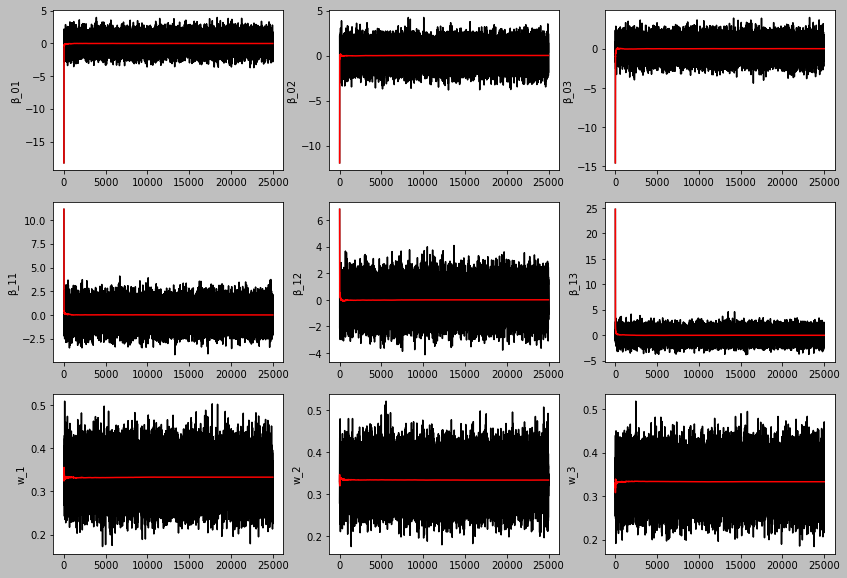

In [19]:
generate_traceplots(N, beta1, beta2, beta3, w, a, sigma_sq)

## Part (g): How to assess MCMC convergence?

**Answer:**
In order to assess the convergence of the MCMC sampling, we examine the density of mixture over a dense grid of x values. To generate this we use the posterior samples of the parameters $((\boldsymbol\beta^{(1)}, \boldsymbol{w}^{(1)}, {\sigma^2}^{(1)}, a^{(1)}),\ldots,(\boldsymbol\beta^{(T)}, \boldsymbol{w}^{(T)}, {\sigma^2}^{(T)}, a^{(T)}))$

The estimated density of mixture is given by,

$$\hat h(y, x) = \frac{1}{T} \sum_{t=1}^{T} \sum_{k=1}^K {w_k}^{(t)} \mathtt{g}(y, x; {\beta_k}^{(t)}, {\sigma^2}^{(t)})$$

By examining the plot of estimated density, we can validate how well it represents the data. 